<a href="https://colab.research.google.com/github/Tommmster/diplodatos-2022-g20/blob/main/Entregable_Parte_1_g20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

### **Edición 2022**

---
## **Trabajo práctico entregable - Parte 1**
---

## **Grupo 20**

**Integrantes:** Fanny Ruales, Gastón Briozzo, Jonatan Garnier, Laura Velazquez, Tomás Niño Kehoe

**Profesor de Práctico:** Alejandro García

# Importación de librerias y dataset

In [217]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [218]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

# **Ejercicio 1**

## **1.** Seleccionar las columnas relevantes para analizar.

## **1.1.** Sueldo Neto Vs. Sueldo Bruto

Lo primero será comparar las estadísticas para los salarios en bruto y en neto, para decidir cual columna es la mas relevante y representativa. En la siguiente tabla se puede ver:
1. Existen respuestas que no consideran el sueldo neto.
2. El 75% de los sueldos brutos se encuentra por debajo de los $145.000
3. Los sueldos brutos y netos no tienen una distribución simétrica
4. La proporción del sueldo neto como parte del bruto no es constante a medida que aumentan los sueldos.

In [219]:
bruto = 'salary_monthly_BRUTO'
neto = 'salary_monthly_NETO'

def adds_gross_to_net_ratio(data, name='ratio'):
  n = data[[bruto, neto]].describe().round()
  n['ratio'] = n[bruto].div(n[neto])
  return n

salarios = adds_gross_to_net_ratio(df)
salarios

,salary_monthly_BRUTO,salary_monthly_NETO,ratio
count,6095.0,5883.0,1.036036
mean,124059.0,94908.0,1.307150
std,122912.0,96862.0,1.268939
min,1.0,1.0,1.000000
25%,61595.0,51480.0,1.196484
50%,96000.0,78000.0,1.230769
75%,145000.0,106000.0,1.367925
max,2180000.0,2080000.0,1.048077


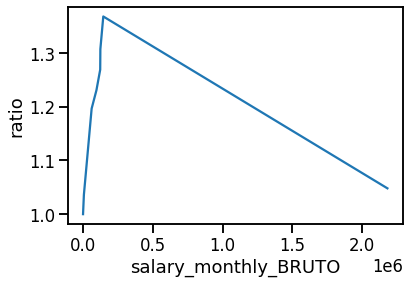

In [220]:
seaborn.lineplot(data=salarios, x=bruto, y='ratio')

Un vistazo sobre las encuestas que no tienen un sueldo neto muestra que esto afecta mayormente a sueldos por debajo de los \$200.000

count        212.0
mean      181693.0
std       163598.0
min            1.0
25%        77250.0
50%       130000.0
75%       225750.0
max      1031250.0
Name: salary_monthly_BRUTO, dtype: float64

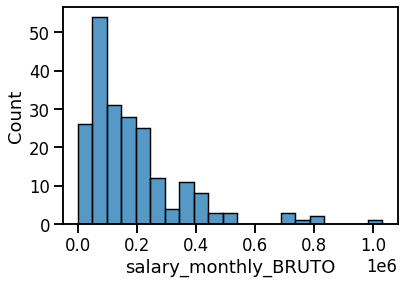

In [221]:
gross_only = df[df[neto].isnull()]
seaborn.histplot(data=gross_only, x=bruto)
gross_only[bruto].describe().round()

Hay 6095 celdas con salary bruto pero solo 5883 con neto ¿Qué pasó ahí?

Las distribuciones parecen ser proporcionales

Veamos ahora la distribución de sueldos netos y brutos

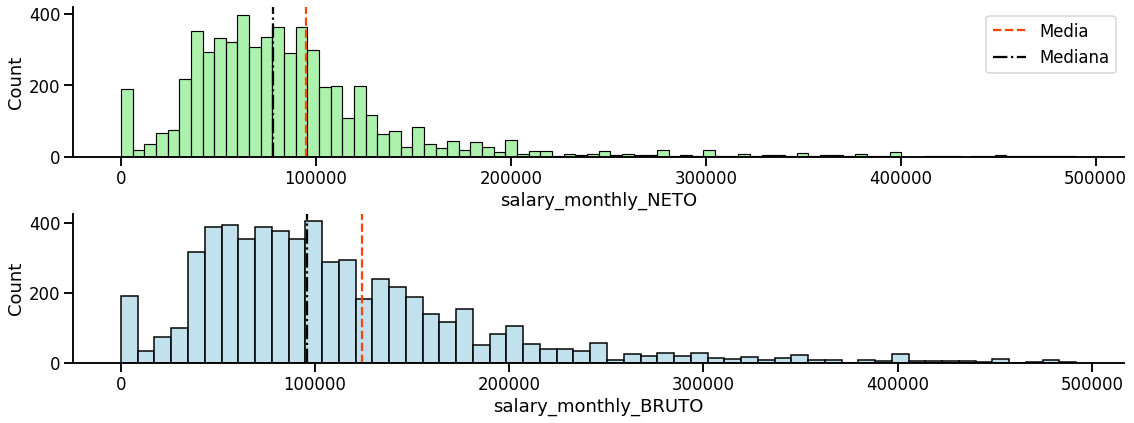

In [222]:
salary_col_neto = 'salary_monthly_NETO'
salary_col_bruto = 'salary_monthly_BRUTO'

fig, axes = plt.subplots(nrows=2, figsize=(16, 6))
fig.tight_layout()

seaborn.histplot(data=df[df[salary_col_neto] < 500000], ax=axes[0], x=salary_col_neto, color='lightgreen')
axes[0].axvline(df[salary_col_neto].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df[salary_col_neto].median(), color='black',
            linestyle='-.', label='Mediana')
  
seaborn.histplot(data=df[df[salary_col_bruto] < 500000], ax=axes[1], x=salary_col_bruto, color='lightblue')
axes[1].axvline(df[salary_col_bruto].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(df[salary_col_bruto].median(), color='black',
            linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine()

Las distribuciones parecen similares, mas alla de un factor de escala

Veamos la relación entre salarios BRUTO y NETO. Inicialmente esperamos qeu estas variables tengan una correlación lineal

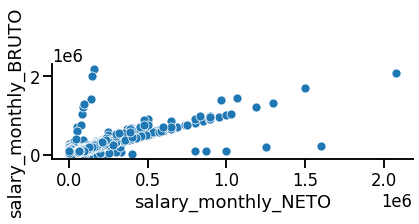

In [223]:
max_age = 99
seaborn.pairplot(data=df[df.profile_age < max_age],
                 y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=3)

Vemos que existen tres lineas principales.

1. Aquellas donde el salario NETO es ligeramente menor al BRUTO. Esta es la línea principal y la que deberíamos considerar correcta.

2. Aquellas donde el NETO es mucho mayor al BRUTO. Esto es absurdo y debe considerarse como un error

3. Aquellas donde el NETO es mucho menor al BRUTO. Esto también es absurdo y debe considerarse como un error

Los valores de sueldo neto deberían ser menores a los valores de sueldo bruto. Sin embargo existen 156 casos que no cumplen esta premisa.

In [224]:
caso1 = df.dropna(subset = [neto], inplace= False)

greaterNeto = caso1[caso1[bruto] < caso1[neto]].copy()

greaterNeto['diferencia_sueldos_neto_bruto'] = df[neto] - df[bruto]

greaterNeto['diferencia_sueldos_neto_bruto'].describe().round()

count        156.0
mean       72865.0
std       178033.0
min            1.0
25%         7860.0
50%        25000.0
75%        69523.0
max      1396000.0
Name: diferencia_sueldos_neto_bruto, dtype: float64

In [225]:
greaterNeto['ratio_neto_bruto'] = greaterNeto[neto].div(greaterNeto[bruto])
greaterNeto['ratio_neto_bruto'].describe().round()

count       156.0
mean       2097.0
std       12926.0
min           1.0
25%           1.0
50%           2.0
75%          46.0
max      118750.0
Name: ratio_neto_bruto, dtype: float64

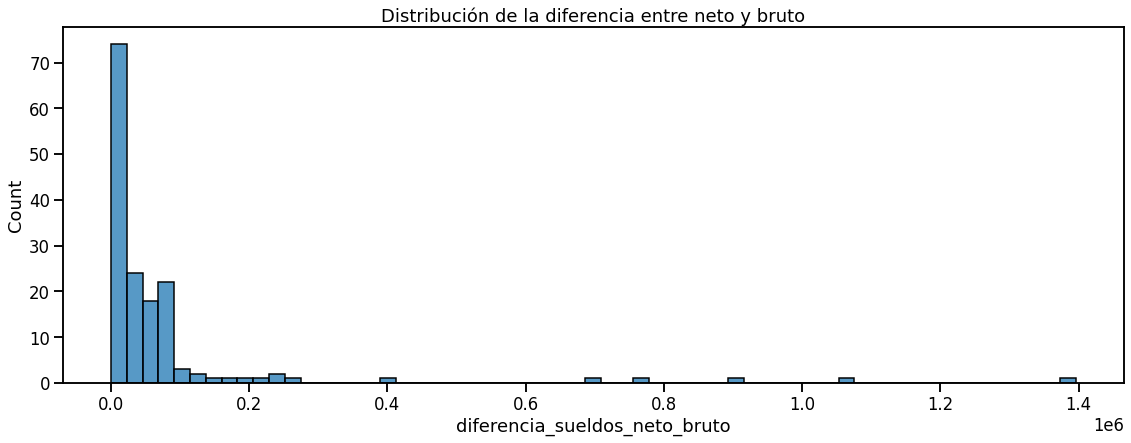

In [226]:
fig, axes = plt.subplots(figsize=(16, 6))
fig.tight_layout()
plt.title('Distribución de la diferencia entre neto y bruto')
seaborn.histplot(data=greaterNeto, x='diferencia_sueldos_neto_bruto')

Al notar que existen varios tipos de contratación, mas allá del tipo 'full-time', notamos que quizás estos valores se encuentran en dichos tipos. Sin embargo vemos que no es el caso.

In [227]:
def curate_work_contract_type(e):
  """
  Shorten long labels 
  """
  if e.startswith('Tercerizado'):
    return 'Consultora / Agencia'
  elif e.startswith('Remoto'):
    return 'Remoto'
  else:
    return e


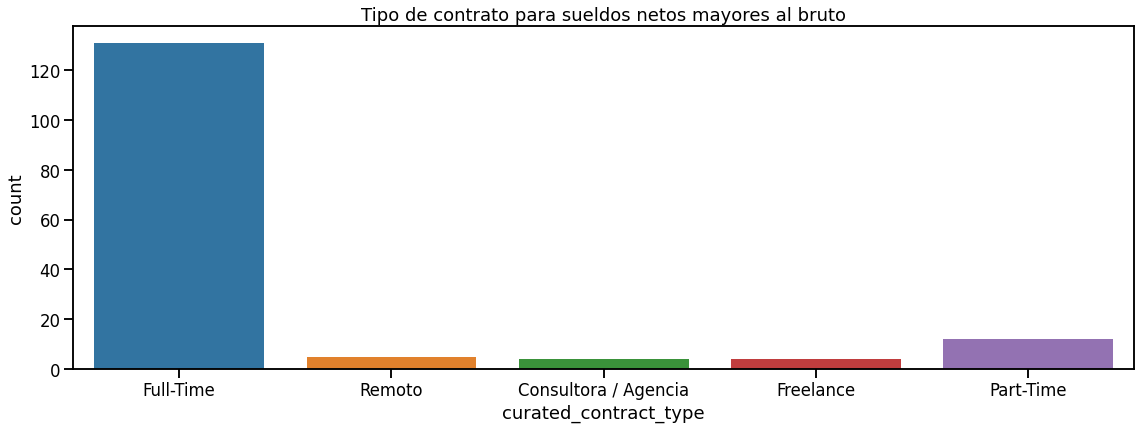

In [228]:
greaterNeto['curated_contract_type'] = greaterNeto.work_contract_type.apply(curate_work_contract_type)
fig, axes = plt.subplots(figsize=(16, 6))
plt.title('Tipo de contrato para sueldos netos mayores al bruto')
fig.tight_layout()
seaborn.countplot(data = greaterNeto, x = 'curated_contract_type')

### Análisis

Primero, contamos con mas datos para analizar del BRUTO que del NETO. Esto puede deberse a errores a la hora de llenar la encuesta. Sin embargo, a la hora de hacer estadísticas es conveniente contar con la mayor cantidad de datos posible.

Segundo, al comparar las estadísticas de ambos salarios, vemos que en general existe un factor aproximadamente 1.23+-0.1 entre ambas columnas. Esto suguiere que si bien existe una diferencia de escala, las propiedades estadísticas de ambas columnas deberían ser similares.

Tercero, los arreglos entre empleador y empleado que determinan el sueldo NETO a cobrar son subjetivos. Al mismo tiempo, no es que el empleado no goce de la parte que se le descuenta, solo no tiene la posibilidad de líquidarla. 

Cuarto, al descartar las relaciones sin sentido entre salarios NETO y BRUTO, obtenemos que estos se relacionan de forma lineal, lo que refuerza la idea de que ambas distribuciones son equivalentes. 

#### Conclusión

Por estos motivos, consideramos que no es corecto trabajar con los sueldos NETOS, dado que presentan menor cantidad de datos con mayor sesgo. En su lugar, se recomienda trabajar con los salarios BRUTOS, con propieades estadísticas similares y menor subjetividad.

###**1.2.** Otras columnas relevantes

Ya establecimos que el salario BRUTO será un valor relevante para nuestro análisis. Veamos ahora que otros datos resultarán de interés.

Obviamente, tendremos en cuenta los lenguajes de programación que el empleado dice conoce. Al mismo tiempo, es interesante saber que herramientas de programación usa, dado que estas nos darán un indicio de con que lenguaje realmente trabaja.

Por otro lado, es interesante conocer el rol que desempeña el empleado. Algunos cargos son mas administrativos que de programaión, por lo que no sería correcto pensar que su sueldo se corresponde al de un programador. 

Lo mismo sucede con la cantidad de personas a cargo. Alguien con mas de 5 personas a cargo dificilmente pase buena parte de su tiempo programando.

El tipo de contrato también es relevante. Un empleado de medio tiempo no tiene la misma dedicación que uno full-time, por lo que no tiene sentido comparar sus salarios. Lo mismo para freelancers u otros.

Consideraciones especiales deben tener quienes cobren por guardia o quienes lo hagan en dolares, ya que no estamos comparandolos mismos escenarios.

#### Conclusión

A continuación, presentamos las columnas que hemos considerado relevandes dentro de nuestro análisis.

In [229]:
relevant_columns = ['tools_programming_languages',
                    'salary_monthly_NETO',
                    'salary_monthly_BRUTO',
                    'work_role',
                    'work_contract_type',
                    'work_people_in_charge_of',
                    'tools_frameworks',
                    'salary_on_call_duty_charge',
                    'salary_in_usd',
                    'profile_years_experience'
                    ]

##**2.** Seleccionar las filas relevantes para analizar.

###**2.0.** Separar lenguajes.

Antes que nada, realizaremos el tratamiento sugerido por las docentes de la materia para separar en distintas filas los lenguajes de programación correspondientes a un mismo usuario

In [230]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,work_contract_type,work_people_in_charge_of,tools_frameworks,salary_on_call_duty_charge,salary_in_usd,profile_years_experience,cured_programming_languages
0,ninguno,Ninguno,43000.0,53000.0,Consultant,Full-Time,0,Ninguno,0.0,NaN,3.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,79000.0,Developer,Full-Time,4,"Django, jQuery",0.0,NaN,5.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,Full-Time,4,"Django, jQuery",0.0,NaN,5.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Developer,Full-Time,4,"Django, jQuery",0.0,NaN,5.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,160000.0,Infosec,Full-Time,0,Ninguno,0.0,NaN,2.0,[ninguno]


###**2.1.** Obtener una lista de los lenguajes de programación más populares.

Lo primero que podemos hacer es un conteo de cuantas veces aparece un mismo lenguaje en la es¡ncuesta.

In [231]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:5]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453


####**2.1.1.** Limpieza de lenguajes.

Vemos que muchos de los datos que aparecen no son lenguajes. Realizaremos una limpieza.

Eliminamos las entradas que (al parecer) no son lenguajes de programación

In [232]:
misc = ['/', '-', '|', '.', '', '6.0']
file_formats = ['json', 'xsl', 'xml.', 'xml']
companies = ['google']
words = ['no', 'un', 'y', 'de', 'programo', 'lenguaje', 'propio', 'cliente', 'del', 'pero', 'tal',
        'programación', 'low', 'code', 'son', 'soy', 'lenguajes', 'en',  'interesante', 'nada', 'usar', 'puedo', 'ni',
        'aprendo', 'donde', 'pedorro', 'laburo', 'basico', 'recruiter', 'soy', '(programación', 'lenguaje!!!!', 'ninguna', 'ninguno']

not_programming_languages = misc + file_formats + companies + words

Consideramos los lenguajes de programación _rankeados_ como parte de los 10 mejores en 2020, y agregamos todos aquellos con mas de 30 entradas en la encuesta.

In [233]:
def relevant_languages(data, allowlist, denylist, low_watermark):
  lang_key = 'language'
  ignore_pl_entries = data[lang_key].str.lower().isin(denylist)
  actual_languages = data[~ignore_pl_entries]
  
  # Nos quedamos con los que tienen al menos cierto numero de respuestas
  relevant_mask = actual_languages['frequency'] >= low_watermark
  langs_high = actual_languages[relevant_mask]

  below_threshold = actual_languages[~relevant_mask]
  langs_low = below_threshold[ below_threshold.language.isin(top_10_2020_proglangs)]

  langs_counts = pd.concat([langs_high, langs_low])

  return [a[0] for a in langs_counts.values]

In [234]:
# Filter out languages that we want to exclude
# Complete here with your selected list.

top_10_2020_proglangs = ["python", "java","javascript", "c#", "php", "r", "swift", "objective-c", "typescript"]

interesting_languages =  relevant_languages(data = language_count, 
                                            allowlist = top_10_2020_proglangs, 
                                            denylist = not_programming_languages,
                                            low_watermark = 30)

filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang.programming_language.unique()

array(['html', 'javascript', 'python', 'bash/shell', 'c', 'css', 'java',
       'php', 'sql', 'typescript', 'assembler', 'c#', 'r', '.net',
       'delphi', 'vba', 'scala', 'c++', 'objective-c', 'abap', 'go',
       'perl', 'ruby', 'groovy', 'swift', 'kotlin', 'powershell', 'dart',
       'cobol', 'actionscript'], dtype=object)

###**2.2.** Elección de rangos y valores

####**2.2.1** Personas a cargo

Solo consideraremos aquellos programadores que tengan 4 o menos personas a cargo. En este punto estamos introduciendo un **sesgo**: No consideramos programadores a quienes tienen 5 o mas personas a cargo. Con esto no nos referimos al conjunto de habilidades técnicas que pueda tener una persona, si no qué atribuimos que su sueldo se basa en su capacidad de liderar / controlar / comunicar / reportar mas que programar en sí.

In [235]:
# Existen 623 personas con mas de 5 personas a cargo
FivePlusInCharge = filtered_df_lang['work_people_in_charge_of'] >= 5
out = filtered_df_lang [FivePlusInCharge]
not_managers = filtered_df_lang[~FivePlusInCharge]

filtered_df = filtered_df_lang [~FivePlusInCharge]

No hay cambios en la cantidad de lenguajes

In [236]:
len(filtered_df.programming_language.unique()) / len(filtered_df_lang.programming_language.unique())

1.0

####**2.2.2** Años de experiencia

De manera similar al punto anterior, realizamos un análisis basado en los años de experiencia de una persona. 
Podemos ver mediante histogramas que la media y mediana que existe una correlación positiva entre el sueldo bruto y los años de experiencia. **Sin embargo decidimos no eliminar a los programadores con menos experiencia **

In [237]:
def yoe_partition(data, filter):
  """
  Particiona los datos segun los años de experiencia (yoe)
  """
  f2 = data['salary_monthly_BRUTO'] < 1e6
  p1 = data[filter & f2].reset_index()
  p2 = data[~filter & f2].reset_index()
  
  return (p1, p2)

def plot(**kwargs):
  ax = kwargs['ax']
  data = kwargs['data']
  
  ax.axvline(data['salary_monthly_BRUTO'].mean(), color='orangered',
  linestyle='--', label='Media')
  ax.axvline(data['salary_monthly_BRUTO'].median(), color='black',
  linestyle='-.', label='p50')
  ax.axvline(data['salary_monthly_BRUTO'].quantile(0.95), color='blue',
  linestyle='-.', label='p95')
  
  ax.axvline(data['salary_monthly_BRUTO'].quantile(0.99), color='indigo',
  linestyle='-.', label='p99')

  ax.legend()
  seaborn.histplot(data = kwargs['data'], x=kwargs['x'], ax=ax).set_title(kwargs['title'])

In [238]:
def plot_years_of_experience_partition(data, yoe):
  """
  plots two histograms based on the years of experience (yoe) partition 
  of the supplied dataframe (data).
  """
  # Partition the dataset 
  filter = (data['profile_years_experience'] < yoe) 
  beginners, seniors = yoe_partition(data, filter)

  #plot data
  fig, axes = plt.subplots(nrows=2, figsize=(16, 6))
  plot(data=beginners, ax=axes[0], x=salary_col_bruto, color='lightgreen', title= f'beginners ( < {yoe} yoe)')
  plot(data=seniors, ax=axes[1], x=salary_col_bruto, color='lightblue', title = f'seniors ( >= {yoe} yoe)')
  fig.tight_layout()
  seaborn.despine()

Particionamos el set de datos según años de experiencia (_yoe_) para los valores (1, 2, 4). En cada histograma se indican la media, mediana y percentiles 95, 99 de la partición correspondiente. 
La media y mediana del conjunto de datos fuente se indican debajo (no incluidos en los gráficos.


In [239]:
filtered_df.salary_monthly_BRUTO.describe().round()[['mean', '50%']]

mean    124105.0
50%      96000.0
Name: salary_monthly_BRUTO, dtype: float64

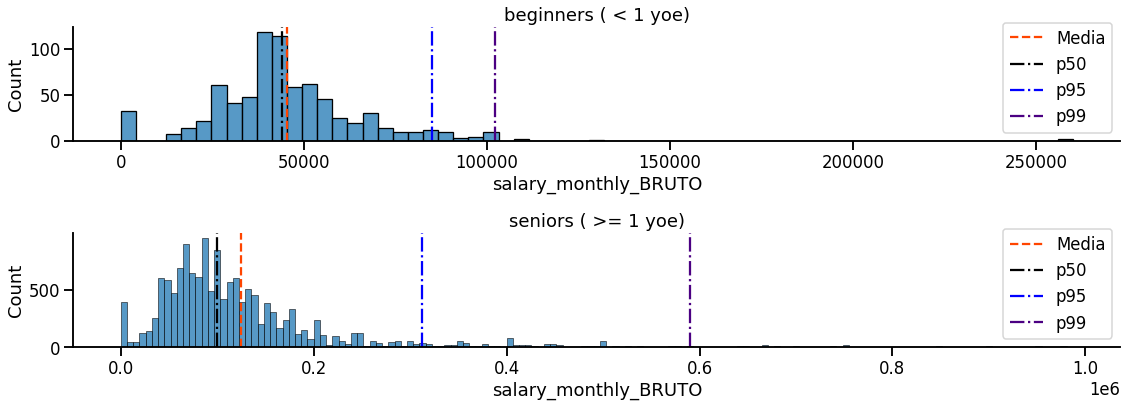

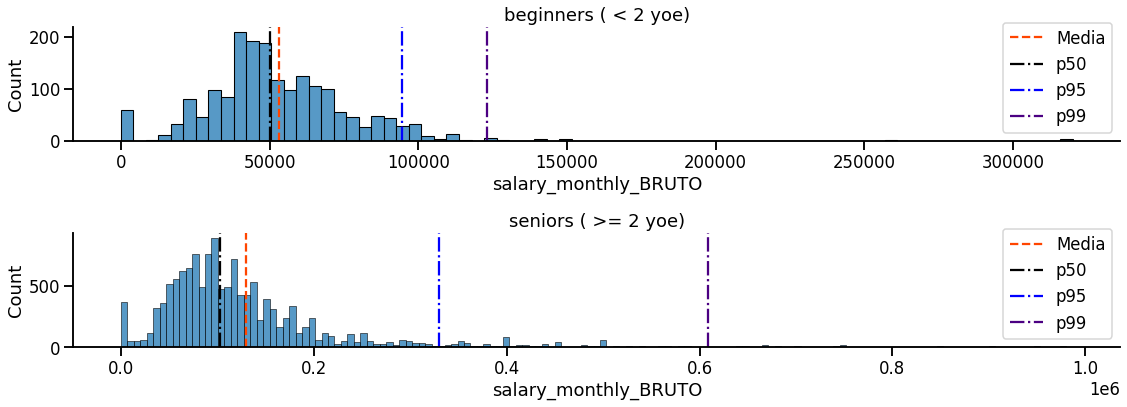

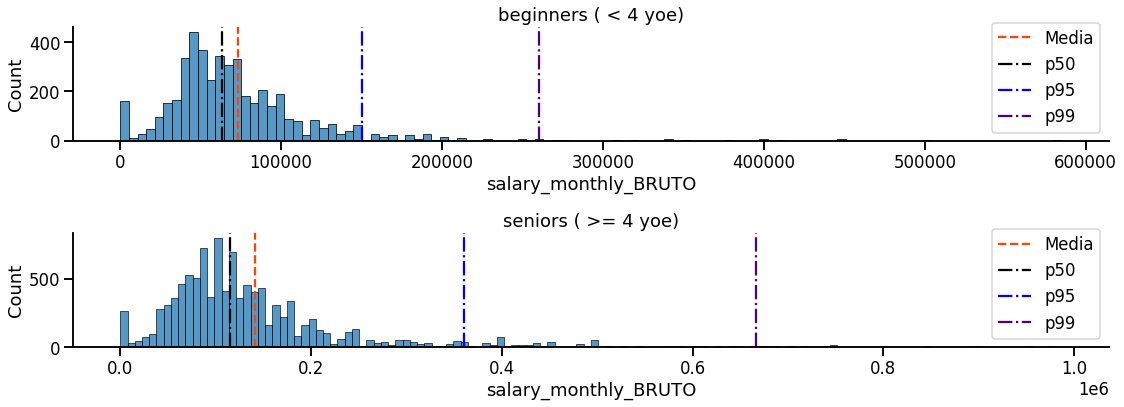

In [240]:
plot_years_of_experience_partition(filtered_df, yoe = 1)
plot_years_of_experience_partition(filtered_df, yoe = 2)
plot_years_of_experience_partition(filtered_df, yoe = 4)

####**2.2.4** Contrato

Solo consideraremos aquellos programadores con contrato full-time.

Veamos cuales son los tipos de contrato que aparecen en la encuesta



In [241]:
df['work_contract_type'].unique()

array(['Full-Time', 'Freelance', 'Part-Time',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Remoto (empresa de otro país)'], dtype=object)

Veamos ahora su distribución

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


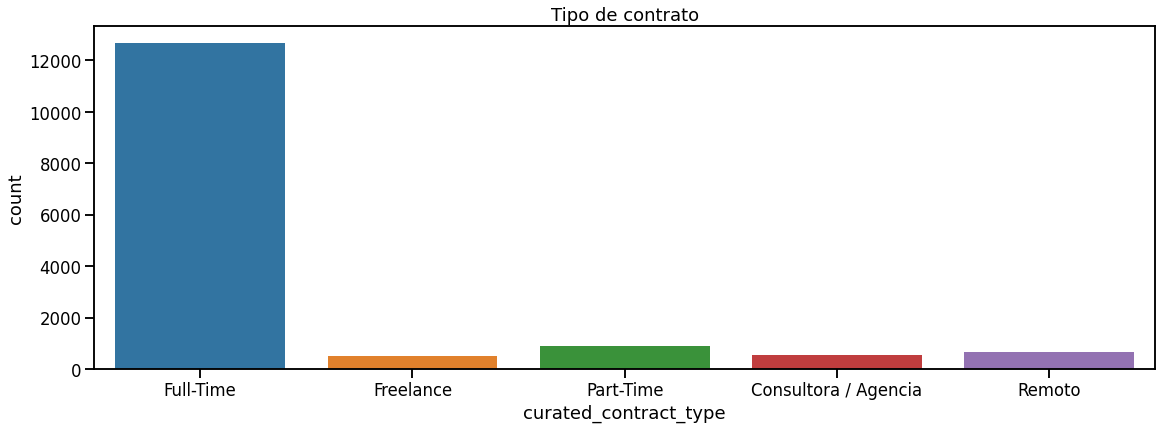

In [242]:
filtered_df['curated_contract_type'] = filtered_df.work_contract_type.apply(curate_work_contract_type)

fig, axes = plt.subplots(figsize=(16, 6))
plt.title('Tipo de contrato')
fig.tight_layout()
seaborn.countplot(data = filtered_df, x = 'curated_contract_type')

Vemos que la gran mayoria de los programadores tienen un contrato full-time, por lo que sus valores deberían ser los mas representativos. 

Al mismo tiempo, los distintos contratos implican distintas responsabilidades, cantidad de horas dedicadas, diferencias salariales, etc., por lo que no es correcto mezclarlos. 

De esta forma, resolvemos considerar únicamente aquellos programadores con un contrato full-time.

In [243]:
nonFullTimeIndices = filtered_df[filtered_df['work_contract_type'] != 'Full-Time'].index.tolist()
filtered_df.drop(nonFullTimeIndices)


,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,work_contract_type,work_people_in_charge_of,tools_frameworks,salary_on_call_duty_charge,salary_in_usd,profile_years_experience,cured_programming_languages,curated_contract_type
1,html,"HTML, Javascript, Python",63000.0,79000.0,Developer,Full-Time,4,"Django, jQuery",0.0,NaN,5.0,"[html, javascript, python]",Full-Time
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,Full-Time,4,"Django, jQuery",0.0,NaN,5.0,"[html, javascript, python]",Full-Time
1,python,"HTML, Javascript, Python",63000.0,79000.0,Developer,Full-Time,4,"Django, jQuery",0.0,NaN,5.0,"[html, javascript, python]",Full-Time
4,css,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,140000.0,Developer,Full-Time,0,"Angular, Node.js",0.0,NaN,9.0,"[css, html, javascript, sql, typescript]",Full-Time
4,html,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,140000.0,Developer,Full-Time,0,"Angular, Node.js",0.0,NaN,9.0,"[css, html, javascript, sql, typescript]",Full-Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6093,java,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,86000.0,SysAdmin / DevOps / SRE,Full-Time,0,Symfony,10.0,NaN,5.0,"[c, c++, html, java, javascript, php, python, ...",Full-Time
6093,javascript,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,86000.0,SysAdmin / DevOps / SRE,Full-Time,0,Symfony,10.0,NaN,5.0,"[c, c++, html, java, javascript, php, python, ...",Full-Time
6093,php,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,86000.0,SysAdmin / DevOps / SRE,Full-Time,0,Symfony,10.0,NaN,5.0,"[c, c++, html, java, javascript, php, python, ...",Full-Time
6093,python,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,86000.0,SysAdmin / DevOps / SRE,Full-Time,0,Symfony,10.0,NaN,5.0,"[c, c++, html, java, javascript, php, python, ...",Full-Time


####**2.2.5** Salario en dolares
En esta sección analizamos la moneda en la que se pagan los contratos

¿Qué porcentaje de los sueldos brutos son en dólares? ¿Tiene sentido analizarlos por separado? ¿Excluirlos del análisis? ¿No hacer ninguna diferenciación en este aspecto?

Veamos que salidas tiene la columna 'salary_in_usd'

In [244]:
filtered_df['salary_in_usd'].unique()

array([nan, 'Mi sueldo está dolarizado'], dtype=object)

No podemos afirmar que aquellas columnas con salida `nan` no esten dolarizadas, por lo que les asignaremos la salida 'sin datos'

In [245]:
def cure_salary_in_usd(v):
  if isinstance(v, float):
    return "sin datos"
  else: 
    return "dolarizado"

filtered_df.loc[:, 'cured_salary_in_usd'] = filtered_df.salary_in_usd\
    .apply(cure_salary_in_usd)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Veamos ahora cual es la proporción entre los salarios dolarizados y los sin datos

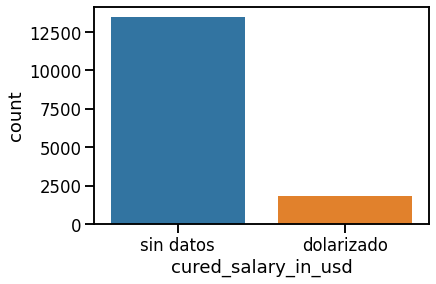

In [246]:
seaborn.countplot(x="cured_salary_in_usd", data = filtered_df)

¿Cuál es el piso de sueldos dolarizados?

Solo podemos asegurar que el 11.8% de los sueldos brutos son en dólares. El restante lo consideramos 'sin datos' (pueden ser dolarizados o no).


In [247]:
len(filtered_df[filtered_df['cured_salary_in_usd'] == 'dolarizado']) / len(filtered_df)

0.11767785849859284

Veamos como cambia la distribución del sueldo en cada lenguaje entre aquellos dolarizados y aquellos sin datos.
Se agrega la media de cada distribución a cada _boxplot_.


Text(0.5, 1.0, 'Sueldos Brutos, separando entre dolarizados y aquellos sin informacion')

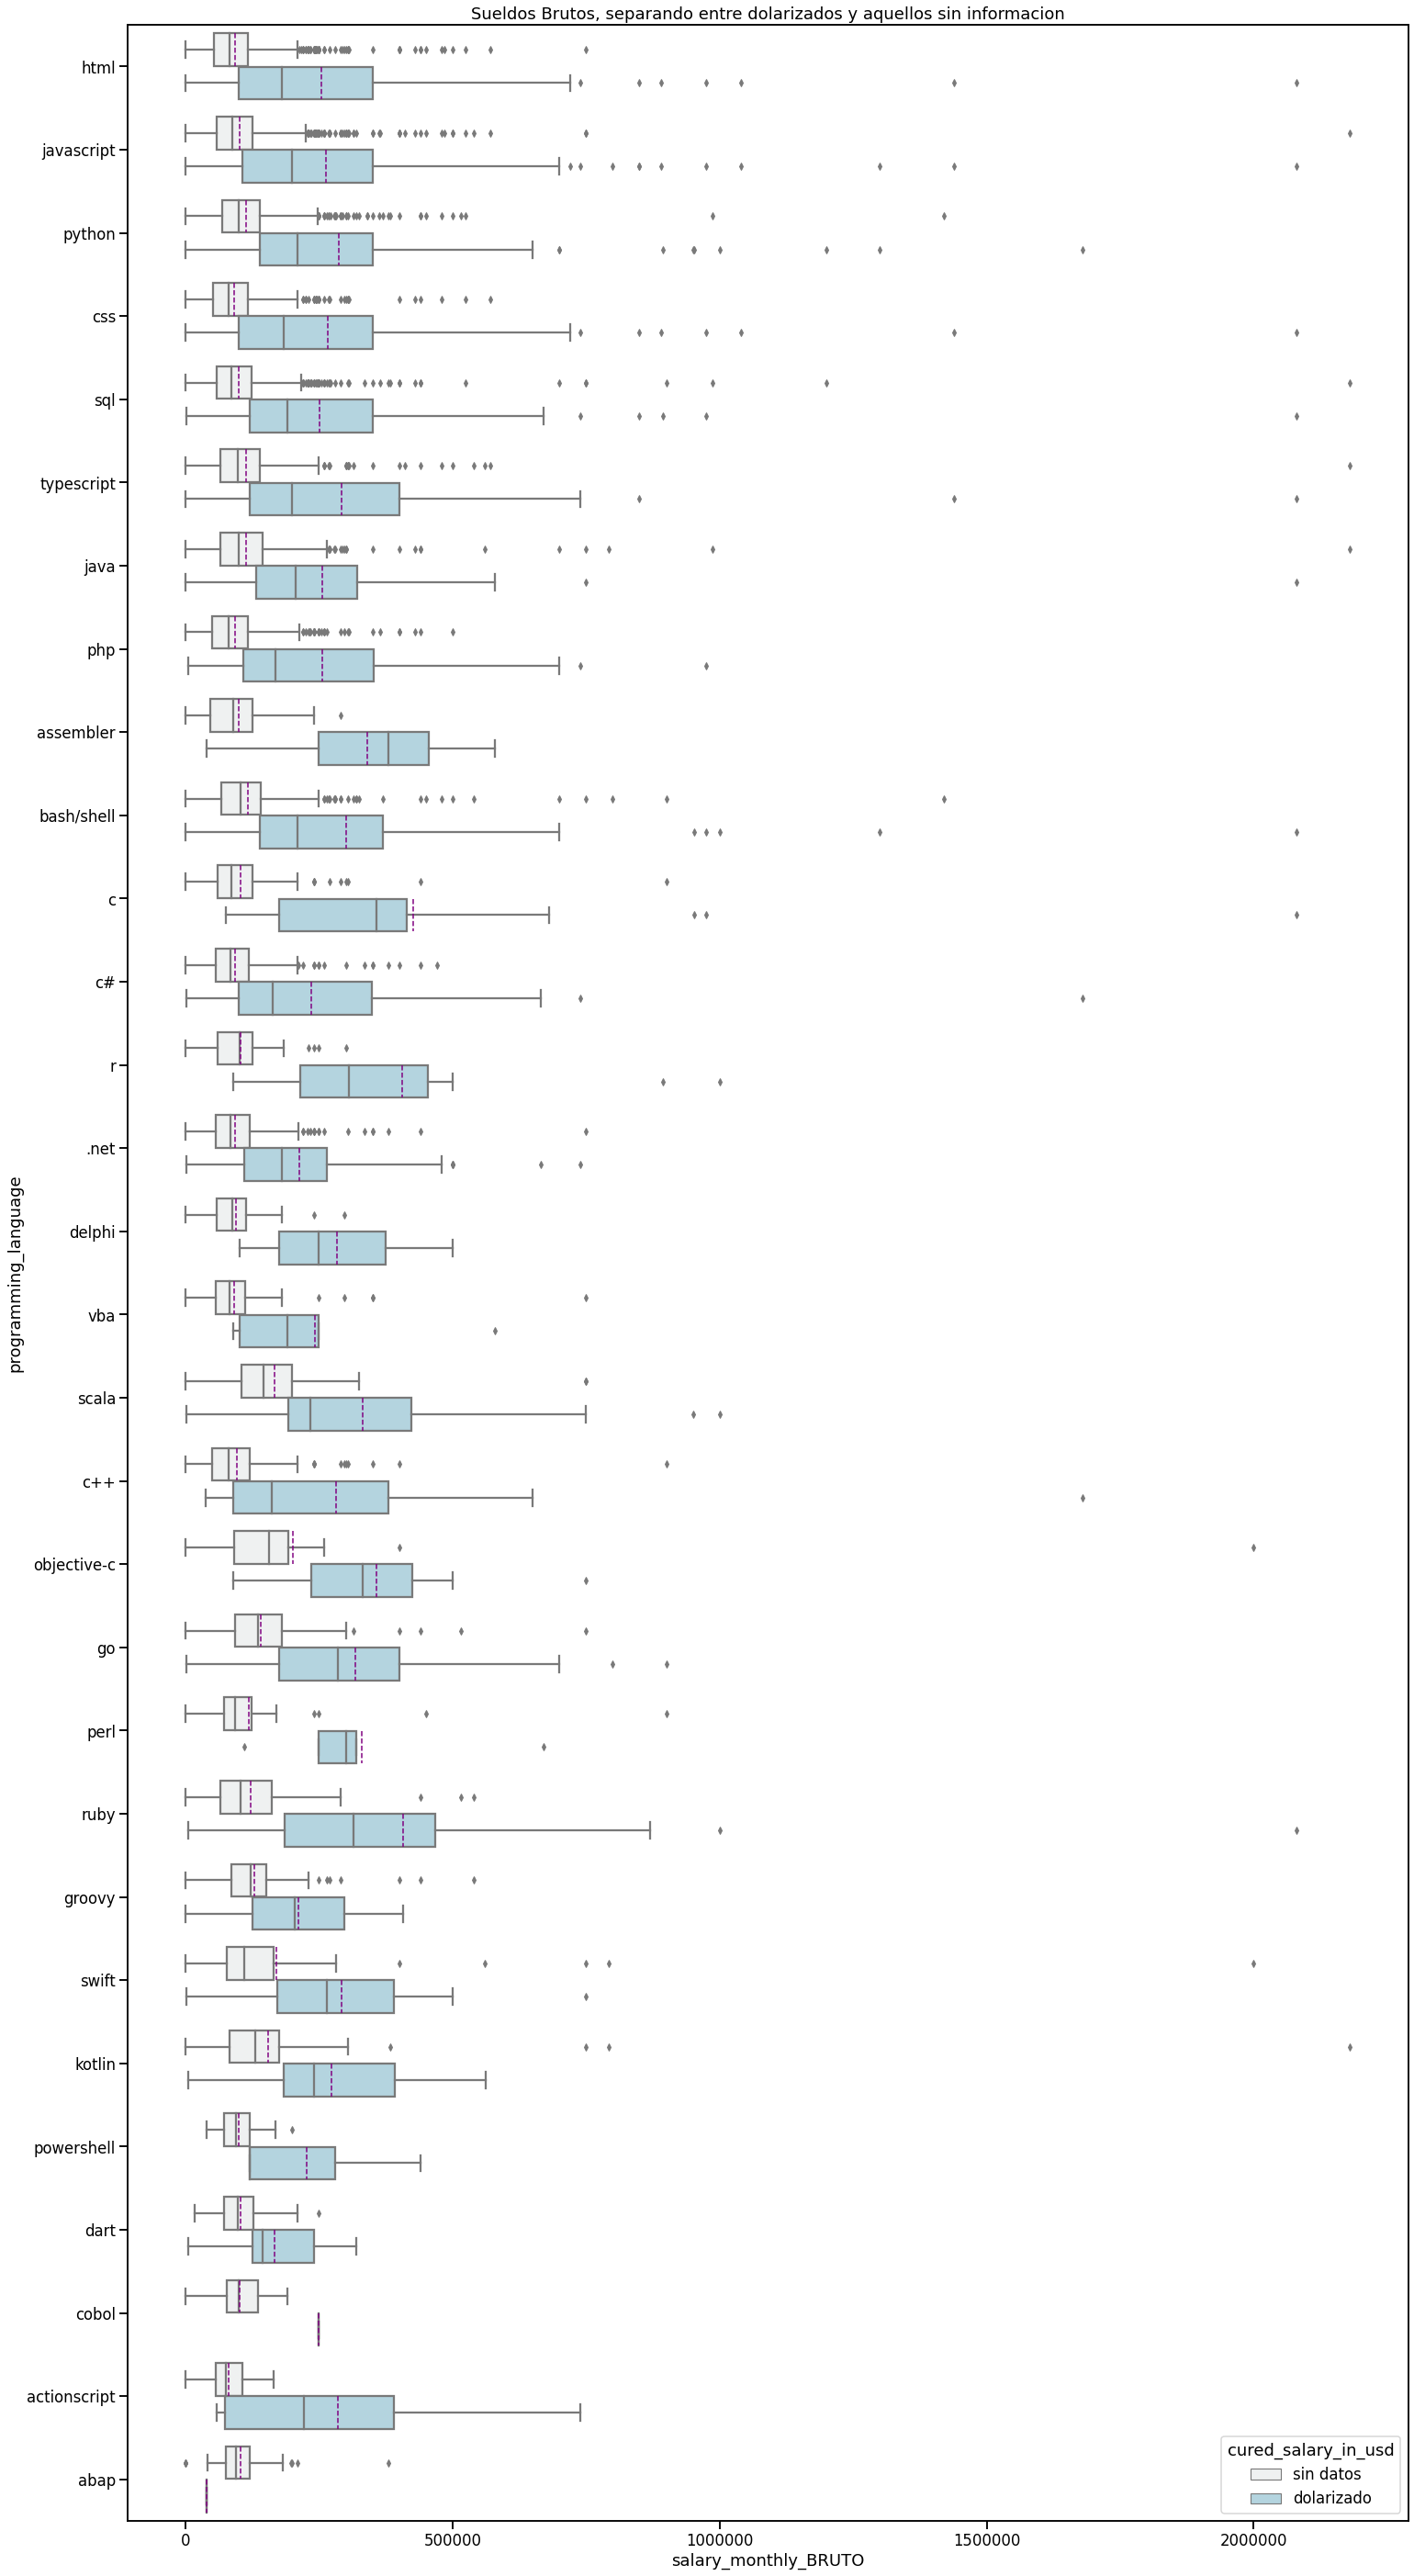

In [248]:
BRUTO = 'salary_monthly_BRUTO'
meanlineprops = dict(linestyle='--', linewidth=1.5, color='purple')

plt.figure(figsize=(25, 50))
seaborn.boxplot(data=filtered_df, x=BRUTO, y='programming_language', hue = 'cured_salary_in_usd',
                color='lightblue', showmeans = True, meanline=True, meanprops = meanlineprops)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Sueldos Brutos, separando entre dolarizados y aquellos sin informacion')

Se puede afirmar (para todos los lenguajes) que los valores de sueldo bruto son superiores cuando son pagados en Dólares, mas allá de no conocer detalles como ser si se trata de un sueldo fijado al Dólar (pero pagado en Pesos) o bien pagados en Dólares en mano
Por este motivo decidimos no separar las entradas que corresponden a salarios en Dólares.

####**2.2.6** Salario bruto

Decidiremos que datos dejar afuera en base a si son consistentes o no con el resto de la información.

¿Cómo se distribuye el sueldo bruto? 

In [249]:
filtered_df['salary_monthly_BRUTO'].describe()

count    1.527900e+04
mean     1.241050e+05
std      1.300659e+05
min      1.000000e+00
25%      6.224600e+04
50%      9.600000e+04
75%      1.410000e+05
max      2.180000e+06
Name: salary_monthly_BRUTO, dtype: float64

Podemos ver que tanto los valores mínimos como los máximos deben ser revisados. 

Un sueldo de 1 ars por **cualquier trabajo** es absurdo (e ilegal) por lo que debemos fijar a partir de que valor comenzar a considerar fiables los sueldos.

Por otro lado, un salario de $2.000.000 es poco común (inicialmente consideramos que puede ser un error) por lo que estos valores también deben ser revisados, fijando una cota máxima a partir de la cual dejaremos de considerar que los sueldos son fiables. 

Veamos algunos quantiles

In [250]:
filtered_df['salary_monthly_BRUTO'].quantile([0.1, 0.5, 0.95, 0.98, 0.995, 0.9985])

0.1000      41000.0
0.5000      96000.0
0.9500     310200.0
0.9800     480000.0
0.9950     796880.0
0.9985    1421585.3
Name: salary_monthly_BRUTO, dtype: float64

Podemos ver que muy pocos programadores ganan arriba de los $1.500.000. Un análisis mas detallado de estos casos revela que se deben a errores de tipeo o a sueldos dolarizados, por lo que no debería haber problema en descartarlos.

Por otro lado, al rededor del 10% de los programadores ganan menos de \$40.000. Considerando que estos son empleos _fulltime_, esto es poco creible, dado que el salario mínimo, vital y móvil en Argentina es de \$20.587,5 (diciembre 2020). Es de esperarse que alguien capacitado como un programador gane por lo menos dos salarios mínimos

Se toman como límites los valores (\$75.000, \$1.500.000)

Filtraremos los datos con sueldos entre las cotas establecidas

In [251]:
filtered_df = filtered_df [filtered_df['salary_monthly_BRUTO'].between(0.7e5, 1.5e6)]
filtered_df.sort_values(by='salary_monthly_BRUTO', ascending=False)[:3]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,work_contract_type,work_people_in_charge_of,tools_frameworks,salary_on_call_duty_charge,salary_in_usd,profile_years_experience,cured_programming_languages,curated_contract_type,cured_salary_in_usd
3358,css,"CSS, HTML, Javascript, TypeScript",1066000.0,1439100.0,Architect,Remoto (empresa de otro país),0,"Angular, Node.js",0.0,Mi sueldo está dolarizado,10.0,"[css, html, javascript, typescript]",Remoto,dolarizado
3358,html,"CSS, HTML, Javascript, TypeScript",1066000.0,1439100.0,Architect,Remoto (empresa de otro país),0,"Angular, Node.js",0.0,Mi sueldo está dolarizado,10.0,"[css, html, javascript, typescript]",Remoto,dolarizado
3358,typescript,"CSS, HTML, Javascript, TypeScript",1066000.0,1439100.0,Architect,Remoto (empresa de otro país),0,"Angular, Node.js",0.0,Mi sueldo está dolarizado,10.0,"[css, html, javascript, typescript]",Remoto,dolarizado


##**3.** Selección de las métricas que ayuden a responder la pregunta y de los métodos para analizarlas.

##**3.1.** Estudio de los histogramas y distribuciones de sueldo de los lenguajes mejor rankeados

### Sueldos brutos por lenguaje de programación

Veamos las distribuciones salariales de los lenguajes que consideramos relevantes. El siguiente gráfico está ordenado por las medianas, agregando el promedio y ocultando los _outliers_.

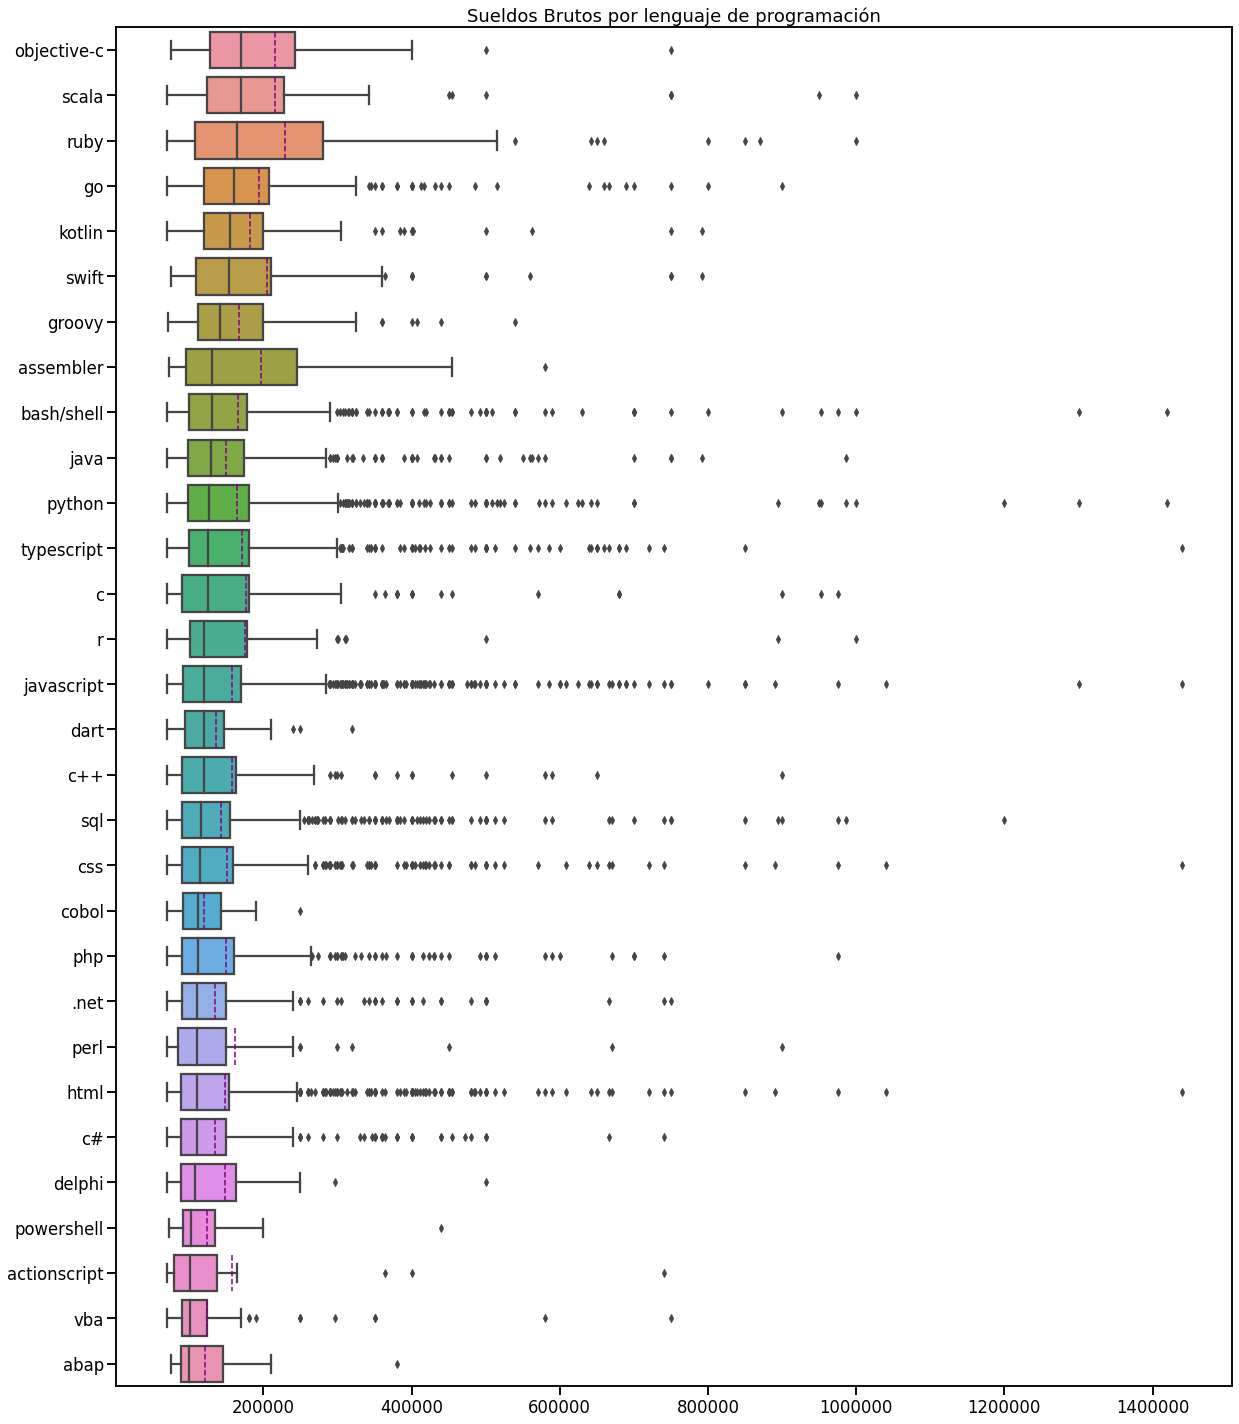

In [252]:
grouped = filtered_df.reset_index().groupby('programming_language')
mm = pd.DataFrame({col:vals['salary_monthly_BRUTO'] for col, vals in grouped})

medians = mm.median().sort_values(ascending=False)

plt.figure(figsize=(20, 25))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Sueldos Brutos por lenguaje de programación')

seaborn.boxplot(data= mm[medians.index] , orient='h', showmeans = True, meanline=True, meanprops = meanlineprops)

Estos gráficos sirven para darnos una primer idea de cuales son los lenguajes mejor pagos y cuales son sus probabilidades de asegurar un buen salario.

Vemos que existe mucha variación entre las distribuciones de distintos lenguajes, tanto en media como en varianza.

#### Momentos centrales

El _boxplot_ anterior revela que los siguientes lenguajes de programación son los 10 mejores pagos

In [253]:
filtered_df.groupby('programming_language')[BRUTO].agg(['mean', 'median', 'count']).sort_values(by= 'median', ascending=False).head(10)

,mean,median,count
programming_language,,,
objective-c,215955.242424,170000.00,33
scala,215080.904255,170000.00,94
ruby,229079.910917,165000.00,109
go,194699.739440,160000.00,232
kotlin,181901.742701,155000.00,137
swift,204661.450704,154000.00,71
groovy,166629.371774,141750.00,124
assembler,197333.980526,130000.00,19
bash/shell,165383.132865,130000.00,684


Calculemos nuevamente las propiedades estadísticas del salario BRUTO

| Momento             | Valor      | 
|---------------------|------------|
| Mediana             | \$ 120.000 | 
| Media               | \$ 155.663 | 
| Cantidad de puntos  | 10.500     |

In [254]:
filtered_df[BRUTO].describe().apply("{0:.2f}".format)

count      10586.00
mean      155663.59
std       117849.65
min        70000.00
25%        92000.00
50%       120000.00
75%       170000.00
max      1439100.00
Name: salary_monthly_BRUTO, dtype: object

Tomaremos aquellos lenguajes con media mas alta y estudiarmos sus distribuciones salariales.

In [255]:
def plot_side_by_side(data, left_lang, right_lang):
  left = data[data ['programming_language'] == left_lang]
  right = data[data['programming_language'] == right_lang]

  fig, axes = plt.subplots(2, 1, figsize=(20,10))
  fig.tight_layout()


  langs = [(left, left_lang), (right,right_lang)]

  for i, dataset in enumerate(langs):
    datapoints = dataset[0]
    axes[i].set_xlabel(f"Salario Bruto ({dataset[1]})")
    axes[i].axvline(x=datapoints.salary_monthly_BRUTO.median(),
              color='red', linestyle='dashdot', label='median')

    axes[i].axvline(x=datapoints.salary_monthly_BRUTO.mean(),
              color='green', linestyle='dashed', label='mean')
    seaborn.histplot(data=datapoints, x="salary_monthly_BRUTO", binwidth=2.5e4, stat= 'probability', kde=True, ax=axes[i], hue='cured_salary_in_usd')

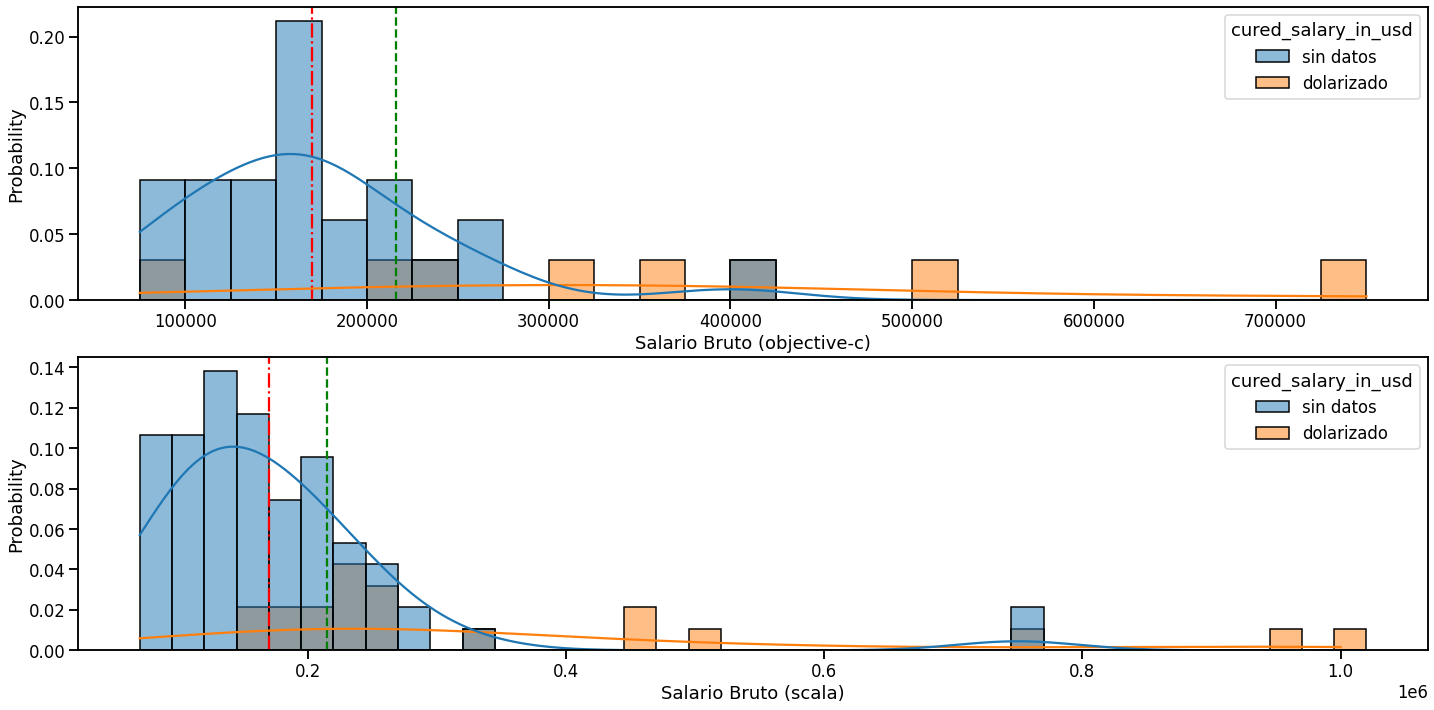

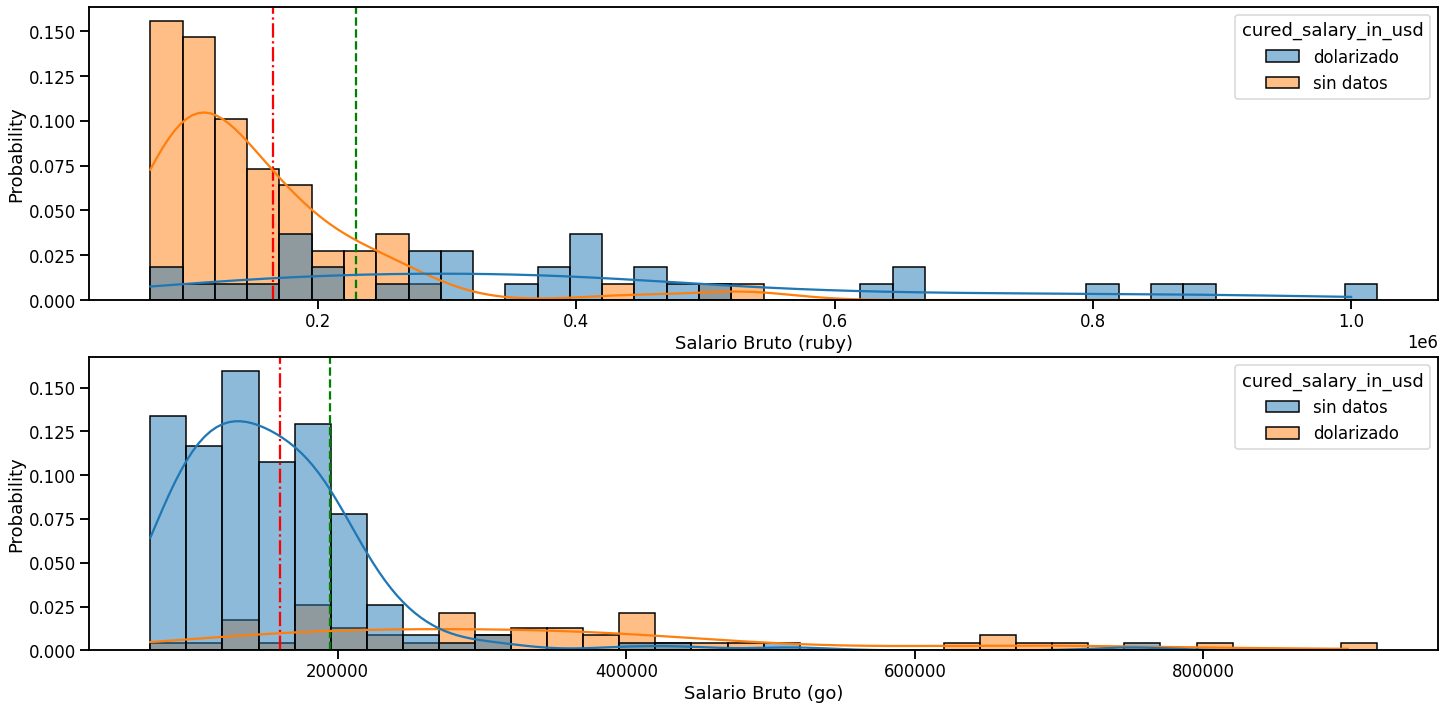

In [256]:
plot_side_by_side(filtered_df, 'objective-c', 'scala')
plot_side_by_side(filtered_df, 'ruby', 'go')


### Distribuciones marginales

In [257]:
median, mean = (filtered_df.salary_monthly_BRUTO.median() , filtered_df.salary_monthly_BRUTO.mean())

def make_central_moments_marker(median, mean):
  def mark_central(ax):
    '''
    Marks the median (dotted-dashed line) and the mean (dashed line)
    '''
    ax.axvline(x=median,
              color='red', linestyle='dashdot', label='median')

    ax.axvline(x=mean,
              color='black', linestyle='dashed', label='mean')
  
  return mark_central


draw_central_moments = make_central_moments_marker(median, mean)


#### Histogramas por lenguajes

Nos interesa saber qué forma tienen las distribuciones marginales de un conjunto limitado de lenguajes.

In [258]:
def marginal_proglang(dataframe, proglang):
  '''
  Returns a copy of the dataframe containing only entries where 'programming_language' matches the argument
  '''
  if isinstance(proglang, str):
    return dataframe[dataframe.programming_language == proglang ].reset_index()
  elif isinstance(proglang, list):
    # Falta que sacar una intersección de la lista.
    return dataframe[dataframe.programming_language.isin(proglang)].reset_index()
  else:
    raise ValueError("proglang must be list or str")

def histogram(dataframe, ax = None, name = None, stat = 'probability'):
  '''
  Draw an histogram for the specified dataframe
  '''
  if ax is None:
    seaborn.histplot(data=dataframe, x="salary_monthly_BRUTO", binwidth=1e4, stat= stat, kde=True, color= 'steelblue')
  else:
    draw_central_moments(ax)
    if name is not None:
      ax.set_xlabel(f"Salario Bruto {name}".title())
    seaborn.histplot(data=dataframe, x="salary_monthly_BRUTO", binwidth=1e4, stat = stat, kde=True, ax = ax, color= 'steelblue', cumulative = False)
    
  

En este punto calculamos las distribuciones marginales para los lenguajes de interés y realizamos un histograma para poder ver la forma de la distribución. En dichos gráficos se agregan la media y mediana de la distribución de salarios brutos (de todos los lenguajes de interés). Nos interesa saber cuál de los lenguajes de programación tiene una mayor probabilidad de estar sobre los momentos centrales.

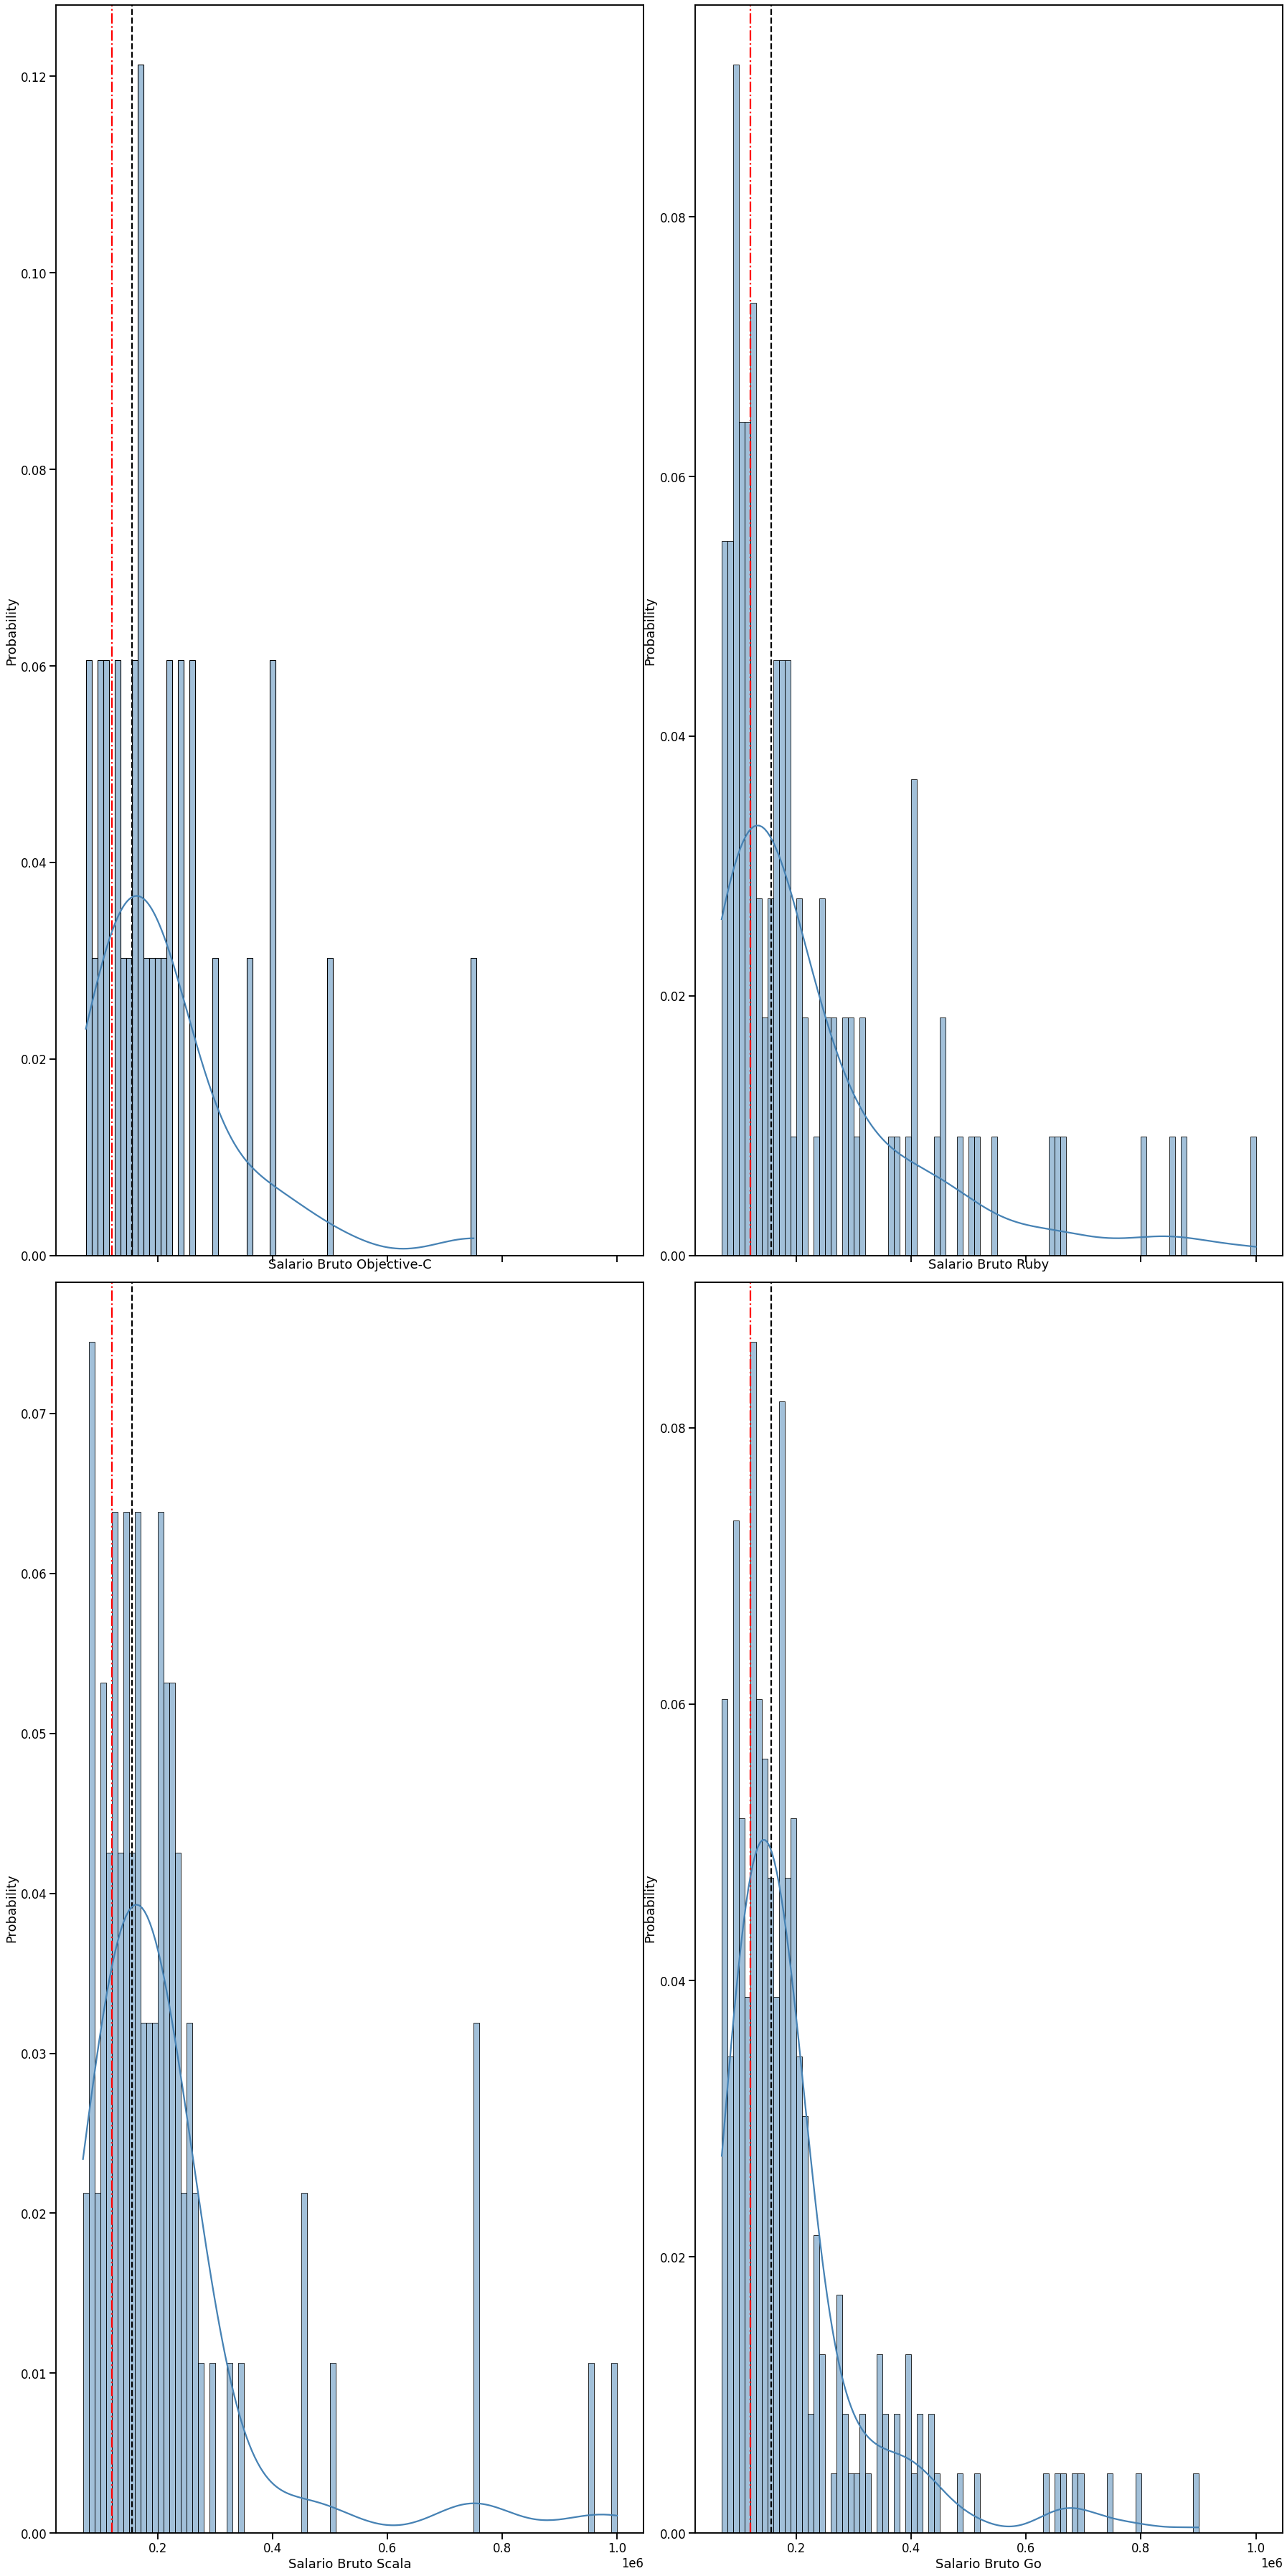

In [259]:
ios_df = marginal_proglang(filtered_df,  'objective-c')
ruby_df = marginal_proglang(filtered_df, 'ruby')
scala_df = marginal_proglang(filtered_df, 'scala')
go_df = marginal_proglang(filtered_df, 'go')


fig, axes = plt.subplots(2, 2, figsize=(25,50), sharex= True)
fig.tight_layout()

histogram(ios_df, ax = axes[0,0], name = 'objective-C')
histogram(ruby_df, ax =  axes[0,1], name = 'ruby')
histogram(scala_df, ax =  axes[1,0], name = 'scala')
histogram(go_df, ax =  axes[1,1], name = 'go')
    
  

## Histogramas por cantidad de datos
¿Qué nos interesa saber? Ver cómo se ordenan los programadores respecto a la media y a la mediana.

Para el caso de Objective-C los datos parecen agruparse en los momentos centrales, con seis programadores por sobre los \$300.000 de salario bruto. Para el caso de Scala el escenario es similar, aunque los ocho valores mas altos están por sobre los $400.000

Por otro lado, Ruby y Go parecen diferenciarse, teniendo mayor cantidad de ocurrencias para valores 'altos' ( $300.000, siendo arbitrarios)

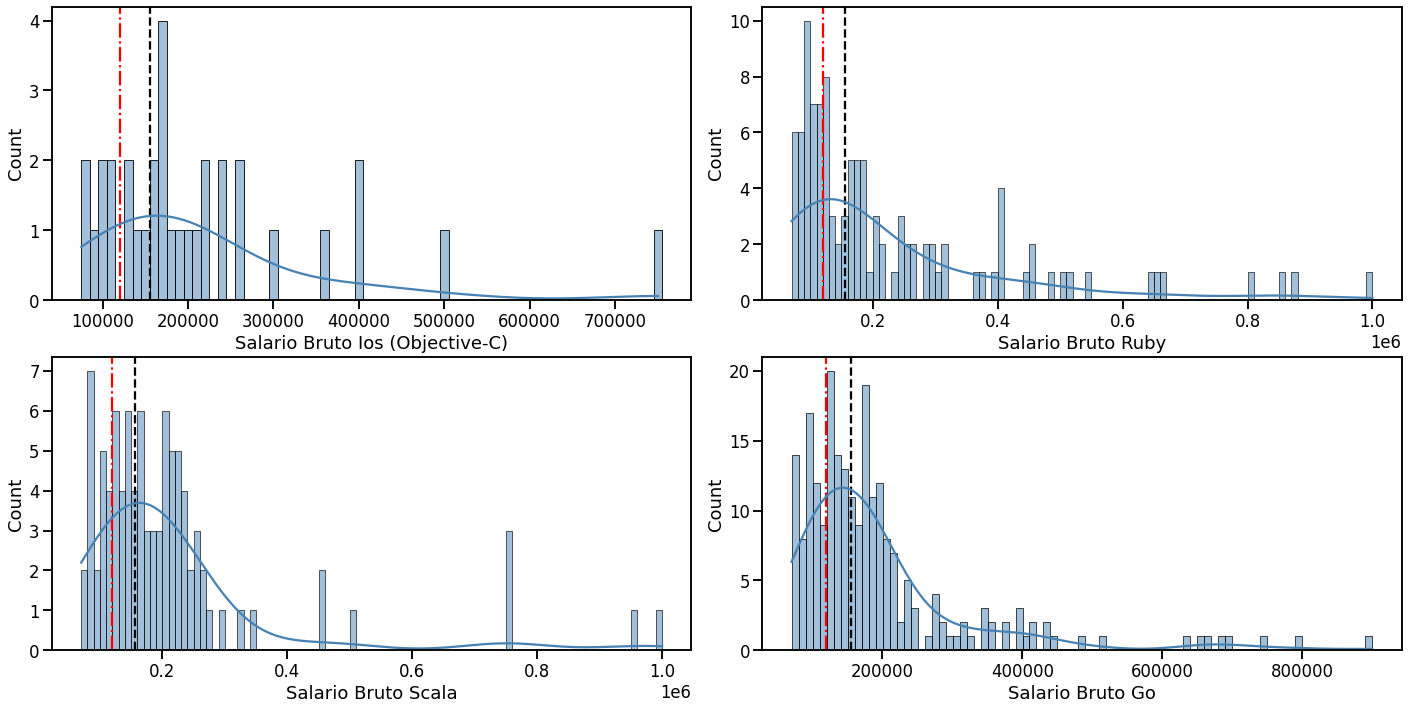

In [260]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))
fig.tight_layout()

histogram(ios_df, ax = axes[0,0], name = 'iOS (objective-C)', stat='count')
histogram(ruby_df, ax =  axes[0,1], name = 'ruby', stat='count')
histogram(scala_df, ax =  axes[1,0], name = 'scala', stat='count')
histogram(go_df, ax =  axes[1,1], name = 'go', stat='count')


#### Probabilidad de ganar mas que la mediana / media

En esta sección intentamos contestar a la siguiente pregunta. Siendo programador *P*, ¿Cuál es la probabilidad de ganar por sobre la mediana / media del resto de los programadores *P* ?

In [261]:
def p_gross_monthly_salary_is_above(dataframe, moment):
  all = filtered_df
  return len(dataframe[dataframe['salary_monthly_BRUTO'] > moment]) / len(dataframe)

p = p_gross_monthly_salary_is_above

## ¿Qué probabilidad hay de ganar mas de la mediana siendo programador de Scala, Golang, Objective-C, Ruby ?

In [262]:
moment = median
ps = [('scala', p(scala_df, moment) * 100), ('ios', p(ios_df, moment) * 100), ('ruby', p(ruby_df, moment) * 100), ('go', p(go_df, moment) * 100)]
sorted(ps, key=lambda tup: tup[1], reverse=True)

[('ios', 78.78787878787878),
 ('scala', 76.59574468085107),
 ('go', 74.13793103448276),
 ('ruby', 64.22018348623854)]

## ¿Qué probabilidad hay de ganar mas de la media siendo programador de Scala, Golang, Objective-C, Ruby ?

In [263]:
moment = mean
ps = [('scala', p(scala_df, moment) * 100), ('ios', p(ios_df, moment) * 100), ('ruby', p(ruby_df, moment) * 100), ('go', p(go_df, moment) * 100)]
sorted(ps, key=lambda tup: tup[1], reverse=True)


[('ios', 66.66666666666666),
 ('scala', 60.63829787234043),
 ('ruby', 53.21100917431193),
 ('go', 52.1551724137931)]

## Conclusión
A partir de estos últimos resultados, calculando que el sueldo bruto esté por encima de la media y mediana, podemos concluir que el lenguaje mejor pago es Objective-C

##**3.2.** Estudio de las probabilidades de ganar mas que x en función de x para los lenguajes mejor rankeados (**Gaston**)

### **3.2.1** Selección de lenguajes relevantes

Una vez decidido que columnas y valores seran conservadas en nuestro dataframe, vamos a hacer un estudio sobre que lenguajes van a ser los mas relevantes, para centrar nuestro análisis sobre estos. 

####**3.2.1.1** Lenguajes con mas de 30 usuarios

Para empezar, confeccionaremos una lista con los lenguajes de programación que, despues de la curación de datos, conservan al menos 30 usuarios

In [264]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
#print(language_count[:10])

LangPlas30 = []

for leng, frec in language_count.values:
  if int(frec)>=30:
    LangPlas30 += [leng]

LangPlas30[0:5]

['javascript', 'sql', 'html', 'python', 'java']

####**3.2.1.2** Top 10 lenguajes de programación del 2020 al 2022

También confeccionaremos una lista con los lenguajes de programación meyor rankeados en los últimos años (**¿Fuente?**)

In [265]:
top_10_2020_proglangs = ["python", "java", "javascript", "c#", "php", "r", "swift", "objective-c", "typescript"]
top_10_2021_proglangs = ['javascript', 'html/css', 'python', 'sql', 'java', 'node.js', 'typescript', 'c#', 'bash/shell', 'c+']
top_10_2022_proglangs = ['python', 'java', 'javascript', 'c++', 'c#', 'c', 'typescript', 'php', 'perl', 'ruby']

top_20_22 = top_10_2020_proglangs + top_10_2021_proglangs + top_10_2022_proglangs

top_20_22 = list(dict.fromkeys(top_20_22))

print(top_20_22[:])

#Curamos los lenguajes que no aparecen en el dataframe
top_20_22.pop(9)
top_20_22.pop(10)
top_20_22.pop(11)

print(top_20_22[:])

['python', 'java', 'javascript', 'c#', 'php', 'r', 'swift', 'objective-c', 'typescript', 'html/css', 'sql', 'node.js', 'bash/shell', 'c+', 'c++', 'c', 'perl', 'ruby']
['python', 'java', 'javascript', 'c#', 'php', 'r', 'swift', 'objective-c', 'typescript', 'sql', 'bash/shell', 'c++', 'c', 'perl', 'ruby']


####**3.2.1.3** Top 10 2020-2022 + >30

Juntamos en una única lista los lenguajes con mas de 30 usuarios y los dejor rankeados en los últimos años

In [266]:
IntLan = LangPlas30 + top_20_22

IntLan = list(dict.fromkeys(IntLan))

IntLan[0:5]

['javascript', 'sql', 'html', 'python', 'java']

Si, son muchos. Pero lo que siguie reducirá drasticamente la cantidad de lenguajes interesantes

####**3.2.1.3** Top 5 por quartil

Finalmente, confeccionaremos una lista con los lenguajes de programación que ofrecen mayor probabilidad de ganar mas que un cierto salario, para valores significativos de dicho salario.

Para esto, consideraremos solo los lenguiajes que aparecen en la lista IntLan

Primero, definimos la función probabilidad de ganar mas que x dado que se programa en el lenguaje lang

Función p(df,x): esta función nos da la probabilidad de ganar mas que x dentro de un df

In [267]:
def p(dataframe, moment):
  return len(dataframe[dataframe['salary_monthly_BRUTO'] >= moment]) / len(dataframe)

Calculamos la Media y la Mediana

In [268]:
media, mediana = df_lang['salary_monthly_BRUTO'].mean(), df_lang['salary_monthly_BRUTO'].median()
print(media, mediana)

131893.57344672238 100000.0


Calculamos los quantiles de interes

In [269]:
df_lang['salary_monthly_BRUTO'].quantile([0.5, 0.75, 0.90, 0.95, 0.99])

0.50    100000.0
0.75    150000.0
0.90    240000.0
0.95    342500.0
0.99    690000.0
Name: salary_monthly_BRUTO, dtype: float64

Para cada lenguaje en IntLan, calculamos la probabilidad de ganar mas que la mediana

In [270]:
top5mediana = []
for lenguaje in IntLan:
  top5mediana += [[lenguaje, p(df_lang[df_lang['programming_language'] == lenguaje], mediana)]]

top5mediana = sorted(top5mediana, key=lambda tup: tup[1], reverse=True)
top5mediana = top5mediana[:5]
top5mediana

[['scala', 0.8347826086956521],
 ['go', 0.7875816993464052],
 ['objective-c', 0.7647058823529411],
 ['kotlin', 0.7225130890052356],
 ['groovy', 0.7159763313609467]]

Para cada lenguaje en IntLan, calculamos la probabilidad de ganar mas que la media

In [271]:
top5media = []
for lenguaje in IntLan:
  top5media += [[lenguaje, p(df_lang[df_lang['programming_language'] == lenguaje], media)]]

top5media = sorted(top5media, key=lambda tup: tup[1], reverse=True)
top5media = top5media[:5]
top5media

[['scala', 0.6956521739130435],
 ['objective-c', 0.6470588235294118],
 ['go', 0.6241830065359477],
 ['kotlin', 0.581151832460733],
 ['swift', 0.5339805825242718]]

Para cada lenguaje en IntLan, calculamos la probabilidad de ganar mas que la Q75

In [272]:
top5Q75 = []
momento = df_lang['salary_monthly_BRUTO'].quantile(0.75)
for lenguaje in IntLan:
  top5Q75 += [[lenguaje, p(df_lang[df_lang['programming_language'] == lenguaje], momento)]]

top5Q75= sorted(top5Q75, key=lambda tup: tup[1], reverse=True)
top5Q75 = top5Q75[:5]
top5Q75

[['scala', 0.6173913043478261],
 ['objective-c', 0.6078431372549019],
 ['go', 0.5392156862745098],
 ['kotlin', 0.5078534031413613],
 ['ruby', 0.47770700636942676]]

Para cada lenguaje en IntLan, calculamos la probabilidad de ganar mas que la Q90

In [273]:
top5Q90 = []
momento = df_lang['salary_monthly_BRUTO'].quantile(0.90)
for lenguaje in IntLan:
  top5Q90 += [[lenguaje, p(df_lang[df_lang['programming_language'] == lenguaje], momento)]]

top5Q90= sorted(top5Q90, key=lambda tup: tup[1], reverse=True)
top5Q90 = top5Q90[:5]
top5Q90

[['assembler', 0.3055555555555556],
 ['ruby', 0.2802547770700637],
 ['objective-c', 0.27450980392156865],
 ['scala', 0.2608695652173913],
 ['swift', 0.24271844660194175]]

Para cada lenguaje en IntLan, calculamos la probabilidad de ganar mas que la Q95

In [274]:
top5Q95 = []
momento = df_lang['salary_monthly_BRUTO'].quantile(0.95)
for lenguaje in IntLan:
  top5Q95 += [[lenguaje, p(df_lang[df_lang['programming_language'] == lenguaje], momento)]]

top5Q95= sorted(top5Q95, key=lambda tup: tup[1], reverse=True)
top5Q95 = top5Q95[:5]
top5Q95

[['ruby', 0.17197452229299362],
 ['objective-c', 0.13725490196078433],
 ['go', 0.11764705882352941],
 ['swift', 0.11650485436893204],
 ['assembler', 0.1111111111111111]]

Para cada lenguaje en IntLan, calculamos la probabilidad de ganar mas que la Q99

In [275]:
top5Q99 = []
momento = df_lang['salary_monthly_BRUTO'].quantile(0.99)
for lenguaje in IntLan:
  top5Q99 += [[lenguaje, p(df_lang[df_lang['programming_language'] == lenguaje], momento)]]

top5Q99= sorted(top5Q99, key=lambda tup: tup[1], reverse=True)
top5Q99 = top5Q99[:5]
top5Q99

[['scala', 0.05217391304347826],
 ['ruby', 0.050955414012738856],
 ['objective-c', 0.0392156862745098],
 ['swift', 0.038834951456310676],
 ['perl', 0.03076923076923077]]

Ahora que tenemos los top 5 por quantil, los juntamos todos en una única lista

In [276]:
lenguajes = []

for num in range(len(top5mediana)):
  lenguajes += [top5mediana[num][0]] + [top5media[num][0]] + [top5Q75[num][0]] + [top5Q90[num][0]] + [top5Q95[num][0]] + [top5Q99[num][0]]

TopLan = np.unique(lenguajes)

TopLan


array(['assembler', 'go', 'groovy', 'kotlin', 'objective-c', 'perl',
       'ruby', 'scala', 'swift'], dtype='<U11')

Estos serán los lenguajes de interes de ahora en adelante.

### **3.2.2** Función probabilidad

Graficaremos la probabilidad de ganar mas que un dado sueldo x en función de x para los lenguajes seleccionados

Finalmente, pasamos a graficar p(lenguaje,sueldo_min), que es la probabilidad de ganar mas que sueldo_min dado que sabes lenguaje. Vamos a graficar esta función para todos los lenguajes obtenidos anteriormente en función del sueldo_min

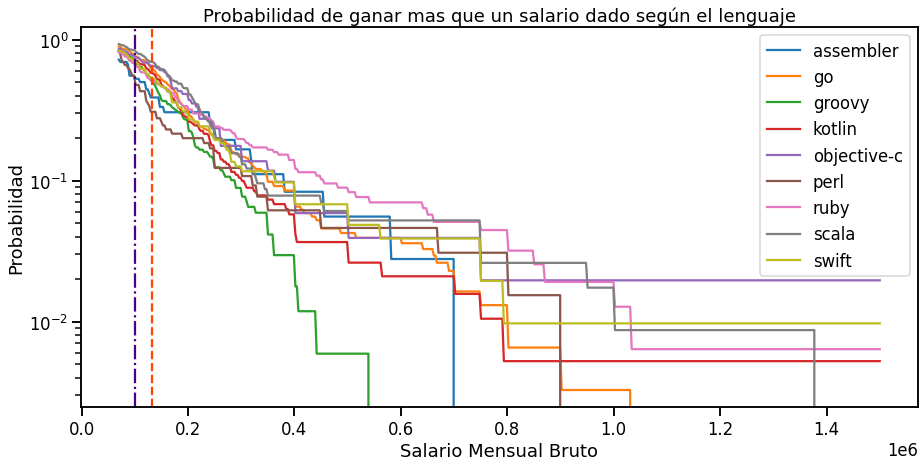

In [277]:
fig = plt.figure(figsize=(15,7))

x_var = []
y_var = []
nombre = []

for num in range(501):
  x_var += [int(70000 + num*(1500000-70000)/500)]

for num in range(len(TopLan)):
  nombre += [str(TopLan[num])]
  y_varn = []
  for x in x_var:
    y_varn += [ float( p(df_lang[df_lang['programming_language'] == nombre[num]], x) )  ]
  y_var += [[ TopLan[num] , y_varn ]]

  fig = seaborn.lineplot(x=x_var,y=y_var[num][1:][0], label=TopLan[num])

fig.axvline(media, color='orangered',
            linestyle='--', label='Media')
fig.axvline(mediana, color='indigo',
            linestyle='-.', label='Mediana')

fig.set_yscale("log")
fig.set_xlabel("Salario Mensual Bruto")
fig.set_ylabel("Probabilidad")
fig.set_title('Probabilidad de ganar mas que un salario dado según el lenguaje')

plt.show() 

#### **Conclusión**

Podemos concluir que, para responder a la pregunta ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?, debemos establecer primero que es un buen salario.

Para sueldos de entre 70 000 y 250 000, el lenguaje de programaciónque ofrece mayores probabilidades de ganar un salario en este rango es Scala, seguido muy de cerca por Objective-C y Go.

Para sueldos de entre 250 000 y 1 000 000, el lenguaje de programaciónque ofrece mayores probabilidades de ganar un salario en este rango es Ruby, anque otros lenguajes como Assembler, Scala, Objective-C, Swift o Perl tambien ofrecen buenas probabilidades.

Finalmente, para sueldos mayores a 1 000 000, el lenguaje de programación que ofrece mayores probabilidades de ganar un salario en este rango es Objective-C, seguido por Swift y Scala.

 

# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## Selección de filas
### Sueldo bruto

In [278]:
df['salary_monthly_BRUTO'].quantile(0.995)


796239.9999999979

In [279]:
df2 = df [df['salary_monthly_BRUTO'].between(6e4,8e5)]


### Gente a cargo

Mas del 87% de los casos están comprendidos por personas que tiene cuatro o menos personas a cargo. No vamos a acotar estas variable, ya que nos interesa estudiarla en la siguiente sección dada su variabilidad. Sin embargo vamos a eliminar los casos con mas de 100 personas a cargo

In [280]:
df2['work_people_in_charge_of'].describe()

count    4705.000000
mean        2.710946
std        37.505172
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max      2500.000000
Name: work_people_in_charge_of, dtype: float64

In [281]:
e = df2['work_people_in_charge_of'].value_counts()

n = e.sort_values(ascending=False).iloc[0:5].sum()
d = e.iloc[:].sum()

print (float(n)/d)

0.8769394261424017


In [282]:
df2 = df2[df2['work_people_in_charge_of'] < 100 ]

Dentro de los casos considerados, la gran mayoría no tiene personal a cargo

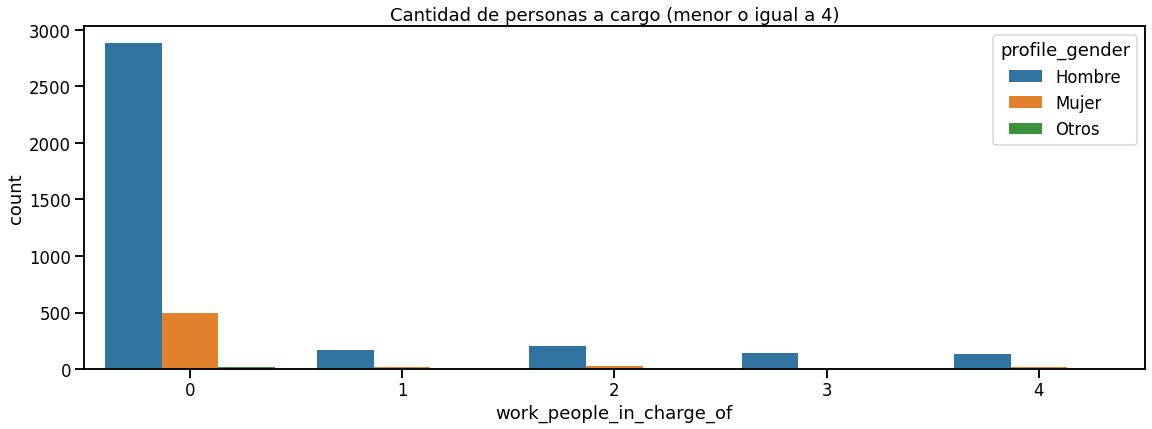

In [283]:
menos_5_a_cargo = df2[df2['work_people_in_charge_of'] < 5]
fig, axes = plt.subplots(figsize=(16, 6))
plt.title('Cantidad de personas a cargo (menor o igual a 4)')
fig.tight_layout()
seaborn.countplot(data=menos_5_a_cargo, x='work_people_in_charge_of', hue='profile_gender')

In [284]:
def plot_gente_a_cargo_vs_bruto(data, gc, ax):
  ax.title.set_text(f"{gc} personas a cargo")
  gente_a_cargo = df2 [df2['work_people_in_charge_of'] == gc]
  seaborn.histplot(data= gente_a_cargo, x='salary_monthly_BRUTO', hue='profile_gender', ax = ax)

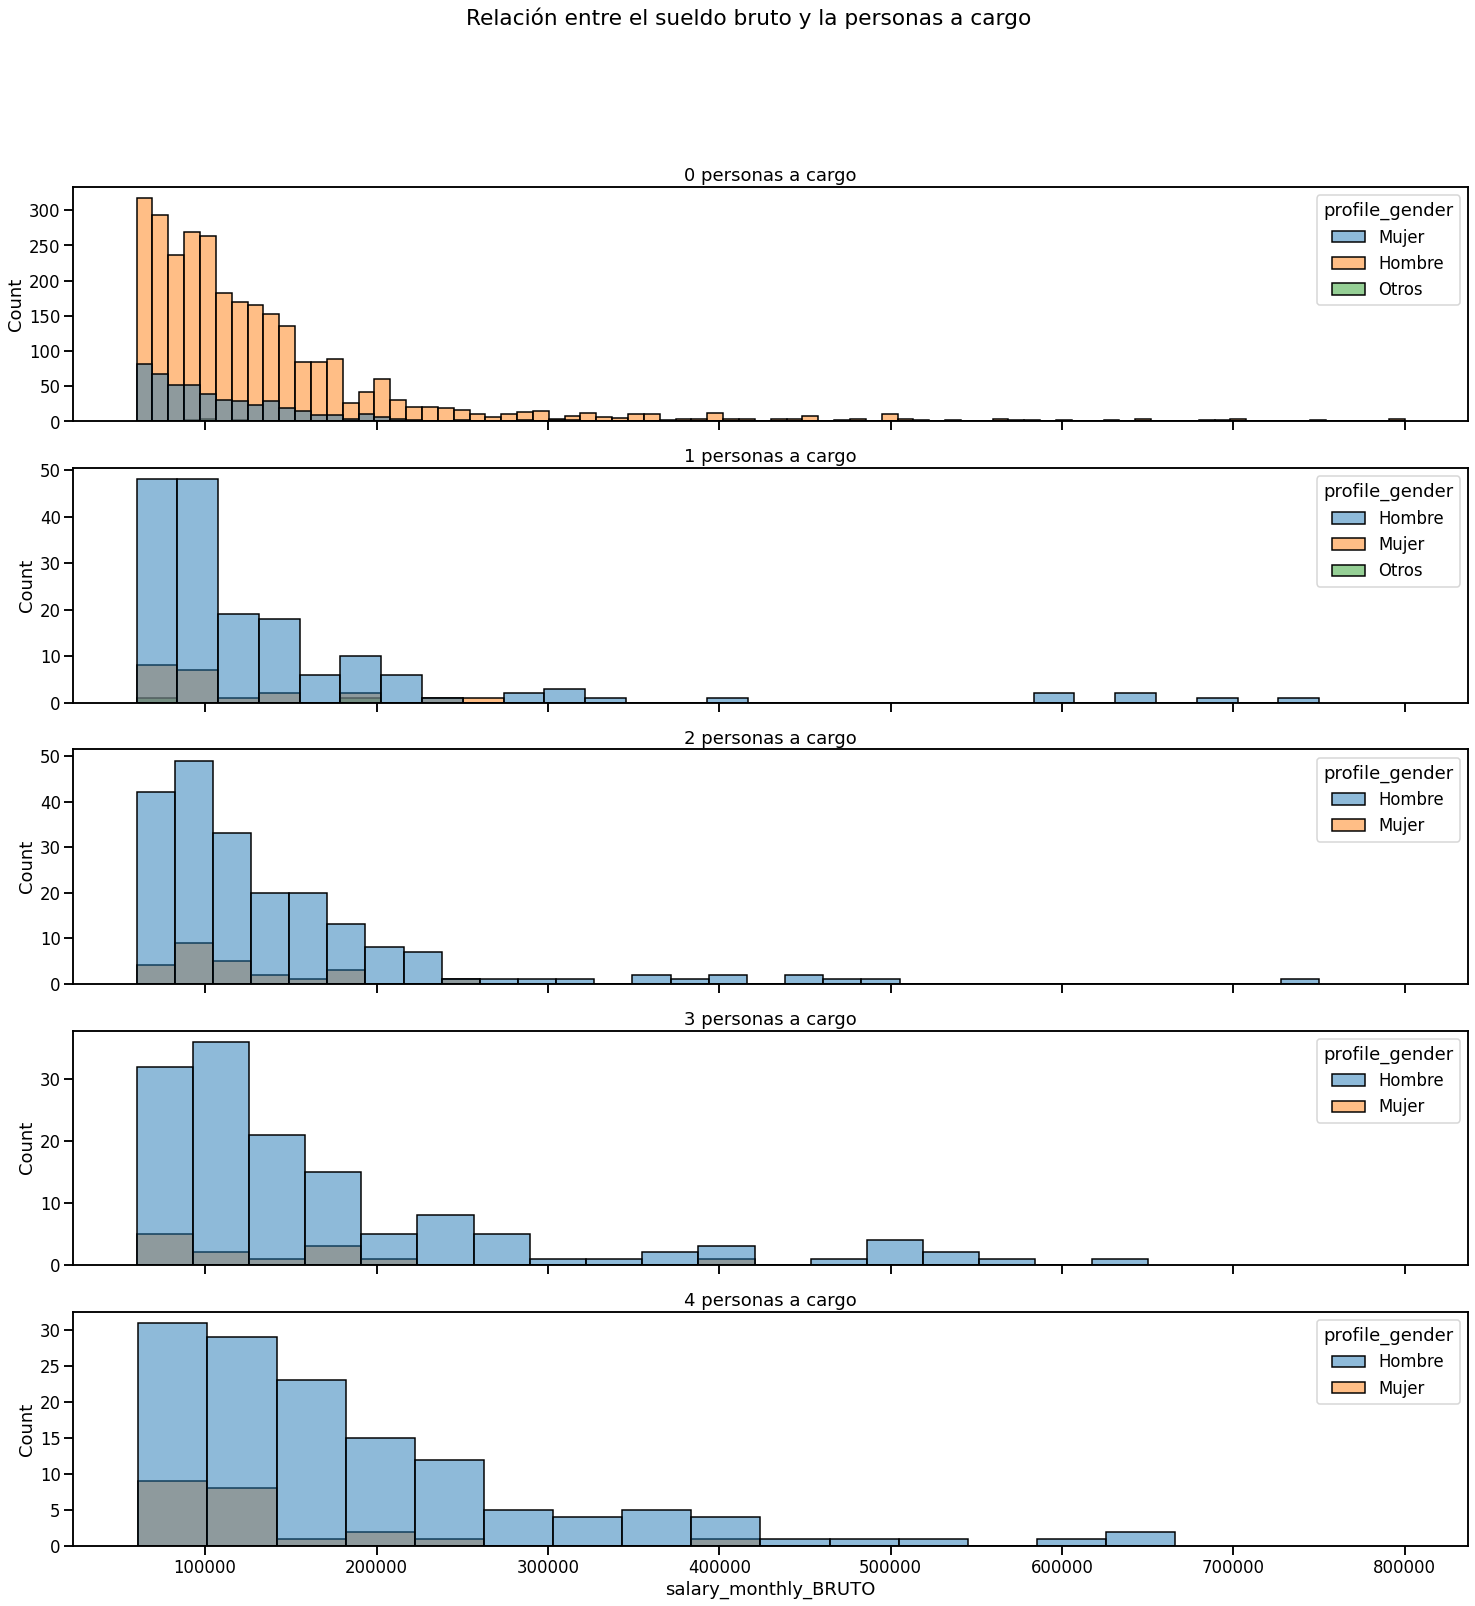

In [285]:
fig, axs = plt.subplots(5, sharex= True, figsize=(25,25))
fig.suptitle('Relación entre el sueldo bruto y la personas a cargo')

for gc in range(0,5):
  plot_gente_a_cargo_vs_bruto(menos_5_a_cargo, gc, axs[gc])


## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa


### Variables categóricas: 
Seleccionamos estas variables categóricas.
* Tipo de contrato
* Género

En los siguientes gráficos apuntamos a describir como evoluciona el salario bruto según cambia el tipo de contrato o el género.

#### Tipo de contrato

¿Qué tipos de contrato existen? ¿Cómo evoluciona el sueldo bruto con el tipo de contrato?

Definimos algunas funciones para describir los datos

In [286]:
def curate_work_contract_type(e):
  """
  Shorten long labels 
  """
  if e.startswith('Tercerizado'):
    return 'Consultora / Agencia'
  elif e.startswith('Remoto'):
    return 'Remoto'
  else:
    return e

In [287]:
def describe_contract_type(data):
  return data['salary_monthly_BRUTO'].describe()

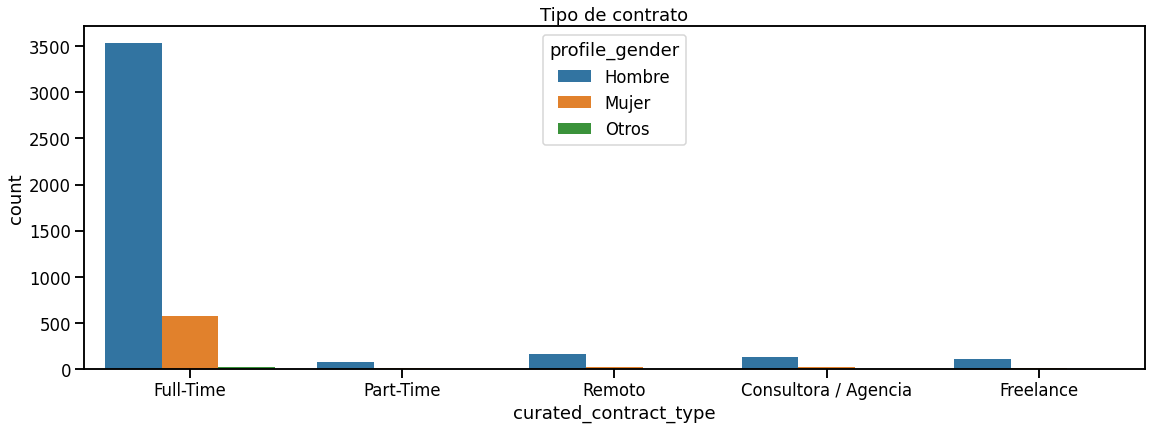

In [288]:
df2['curated_contract_type'] = df2.work_contract_type.apply(curate_work_contract_type)

fig, axes = plt.subplots(figsize=(16, 6))
plt.title('Tipo de contrato')
fig.tight_layout()
seaborn.countplot(data = df2, x = 'curated_contract_type', hue= df2.profile_gender)

In [289]:
gender_hue = ['Hombre', 'Mujer', 'Otros']

In [290]:
df2['curated_contract_type'].value_counts()

Full-Time               4136
Remoto                   193
Consultora / Agencia     152
Freelance                116
Part-Time                 97
Name: curated_contract_type, dtype: int64

In [291]:
def filter_work_type(data, worktype):
  return data[data['curated_contract_type'] == worktype]

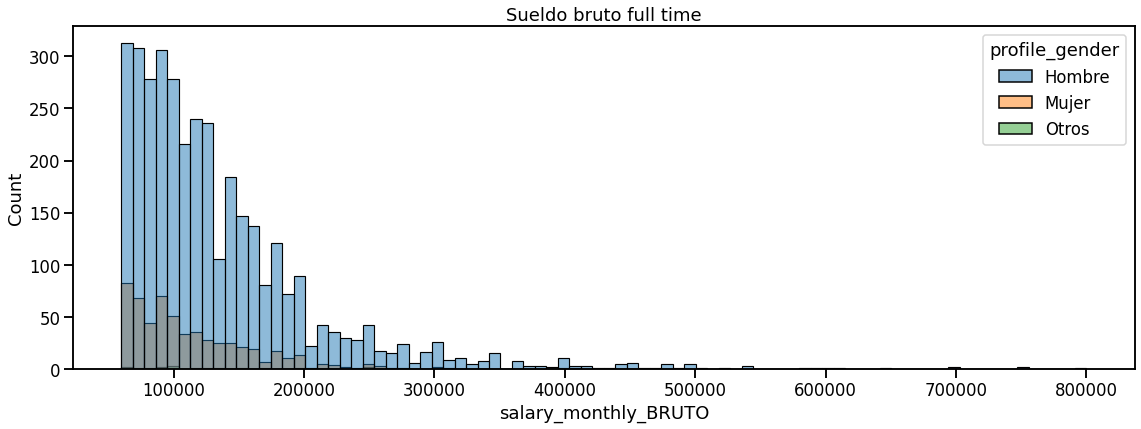

In [292]:
# sueldos para full time
df_full_time = filter_work_type(df2, 'Full-Time')

fig, axes = plt.subplots(figsize=(16, 6))
plt.title('Sueldo bruto full time')
fig.tight_layout()
seaborn.histplot(data=df_full_time, x='salary_monthly_BRUTO', hue='profile_gender', hue_order = gender_hue)

In [293]:
describe_contract_type(df_full_time)

count      4136.000000
mean     132331.871110
std       73106.948574
min       60000.000000
25%       85000.000000
50%      113000.000000
75%      155759.500000
max      800000.000000
Name: salary_monthly_BRUTO, dtype: float64

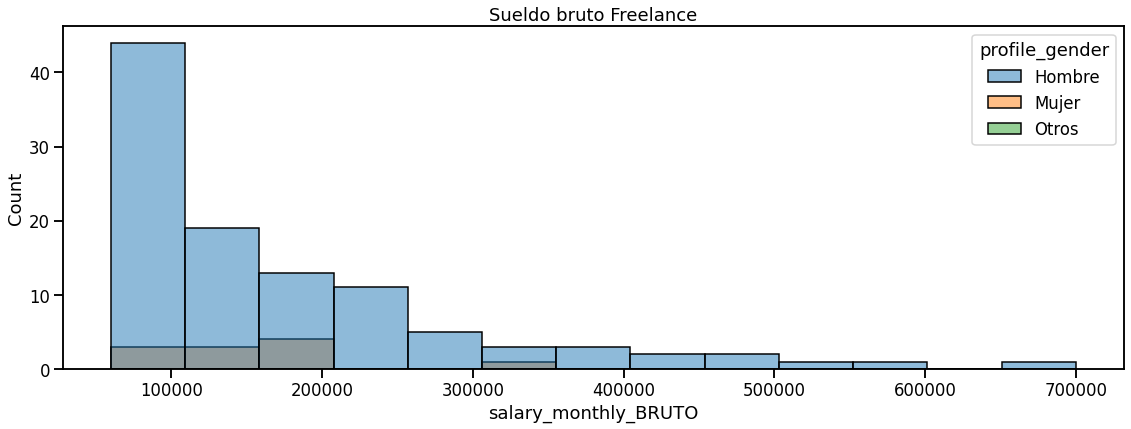

In [294]:
# sueldos para freelance
df_freelance = filter_work_type(df2, 'Freelance')
fig, axes = plt.subplots(figsize=(16, 6))
plt.title('Sueldo bruto Freelance')
fig.tight_layout()
seaborn.histplot(data=df_freelance, x='salary_monthly_BRUTO', hue='profile_gender', hue_order = gender_hue)

In [295]:
describe_contract_type(df_freelance)

count       116.000000
mean     170021.801724
std      121256.620850
min       60000.000000
25%       87750.000000
50%      120000.000000
75%      210967.500000
max      700000.000000
Name: salary_monthly_BRUTO, dtype: float64

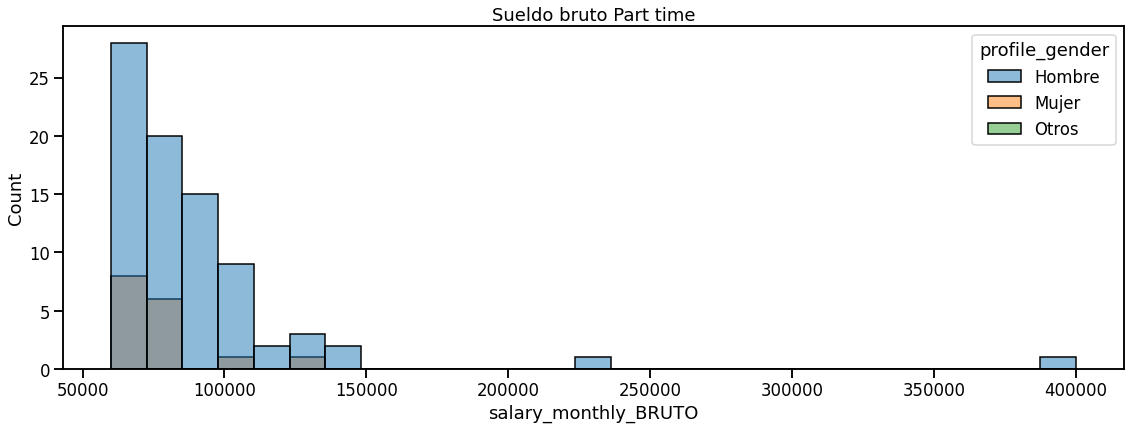

In [296]:
# sueldos para part-time
df_parttime = filter_work_type(df2, 'Part-Time')
fig, axes = plt.subplots(figsize=(16, 6))
plt.title('Sueldo bruto Part time')
fig.tight_layout()
seaborn.histplot(data=df_parttime, x='salary_monthly_BRUTO', hue='profile_gender', hue_order = gender_hue)

In [297]:
describe_contract_type(df_parttime)

count        97.000000
mean      86711.811856
std       40673.489065
min       60000.000000
25%       65127.000000
50%       77000.000000
75%       95000.000000
max      400000.000000
Name: salary_monthly_BRUTO, dtype: float64

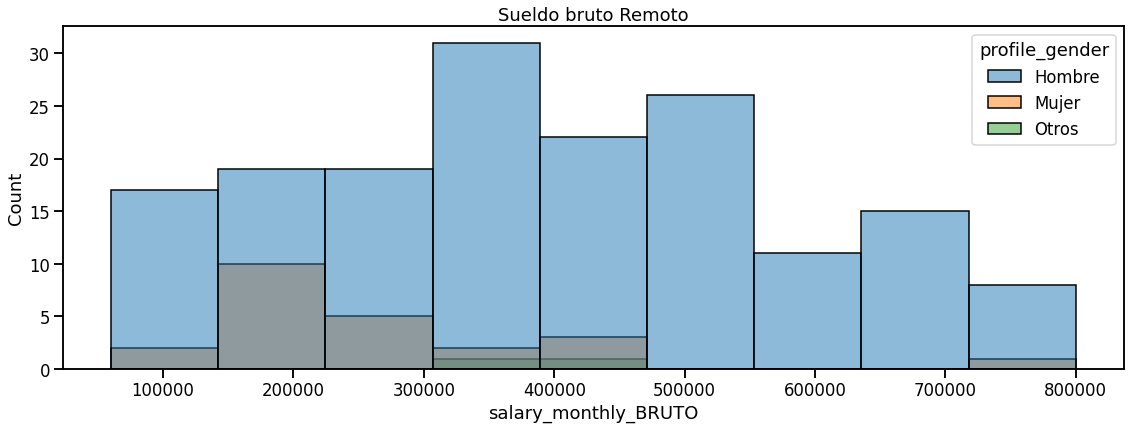

In [298]:
df_remoto = filter_work_type(df2, 'Remoto')
fig, axes = plt.subplots(figsize=(16, 6))
plt.title('Sueldo bruto Remoto')
fig.tight_layout()
seaborn.histplot(data=df_remoto, x='salary_monthly_BRUTO', hue='profile_gender', hue_order = gender_hue)

In [299]:
describe_contract_type(df_remoto)

count       193.000000
mean     377576.654974
std      184805.172638
min       60000.000000
25%      230000.000000
50%      360000.000000
75%      500000.000000
max      800000.000000
Name: salary_monthly_BRUTO, dtype: float64

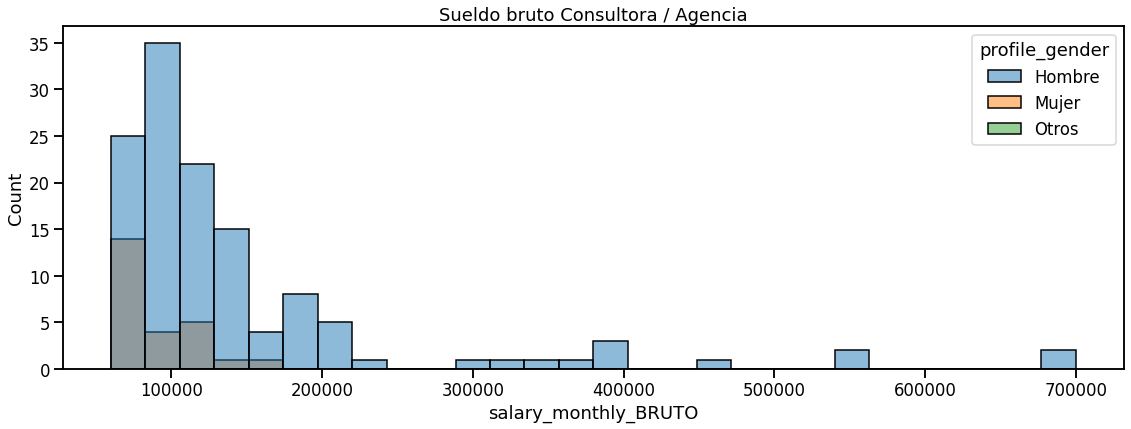

In [300]:
df_consultora = filter_work_type(df2, 'Consultora / Agencia')

fig, axes = plt.subplots(figsize=(16, 6))
plt.title('Sueldo bruto Consultora / Agencia')
fig.tight_layout()
seaborn.histplot(data=df_consultora, x='salary_monthly_BRUTO', hue='profile_gender', hue_order = gender_hue)


In [301]:
describe_contract_type(df_consultora)

count       152.000000
mean     136597.697368
std      107391.553913
min       60000.000000
25%       82075.000000
50%      104000.000000
75%      145000.000000
max      700000.000000
Name: salary_monthly_BRUTO, dtype: float64

#### Genero
¿Cómo se distribuyen el sueldo bruto de quienes respondieron la encuesta, según su género?

In [302]:
df2['profile_gender'].value_counts()

Hombre    4019
Mujer      655
Otros       20
Name: profile_gender, dtype: int64

¿En qué modalidad se trabaja, según el genero? Para todos los casos, la opción mayoritaria es _Full Time_. Todas las opciones restantes se encuentran por debajo del 4%

In [303]:
pd.crosstab(df2.profile_gender, df2['curated_contract_type'], normalize=True)

curated_contract_type,Consultora / Agencia,Freelance,Full-Time,Part-Time,Remoto
profile_gender,,,,,
Hombre,0.027056,0.022369,0.753728,0.017256,0.035790
Mujer,0.005326,0.002343,0.123562,0.003409,0.004900
Otros,0.000000,0.000000,0.003835,0.000000,0.000426


Finalmente, calculamos la probabilidad de ganar mas que un valor arbitrario (\$400.000) para las modalidades de contratación _full time_, _remoto_ y _freelance_.

In [304]:
def prob(data, salary_lb):
  return len (data[ data['salary_monthly_BRUTO'] > salary_lb] ) / len(data)

In [305]:
prob(df_full_time, 4e5) * 100

1.2088974854932302

In [306]:
prob(df_freelance, 4e5) * 100

6.0344827586206895

In [307]:
prob(df_remoto, 4e5) * 100

39.37823834196891

### Variables numéricas: 
*Años en la posición actual, años en la compañia, personas a cargo

En el inicio de la segunda parte limitamos los casos a aquellos que habían contestado tener 4 o menos personas a cargo

#### Años en la posición actual

Podemos interpretar el valor de la columna 'años en la posición actual' como un indicador de movilidad en el trabajo. Dado que sistemas es un area dinámica (no es raro encontrar casos de personas que cambien de trabajo cada 2 años), podemos interpretar que una persona que está un tiempo considerable en la misma posición

In [308]:
def curate_years_in_current_position(e):
  if e <= 1.0:
    return '0-1'
  elif 1.0 < e <= 3.0:
    return '1-3'
  elif 3.0 < e <= 5.0:
    return '3-5'
  elif 5.0 < e <= 10.0:
    return '5-10'
  elif 10.0 < e <= 15.0:
    return '10-15'
  elif 15.0 < e <= 20.0:
    return '15-20'
  else:
    return '20+'
  

df2['years_in_current_position_category'] = df2.work_years_in_current_position.apply(curate_years_in_current_position)

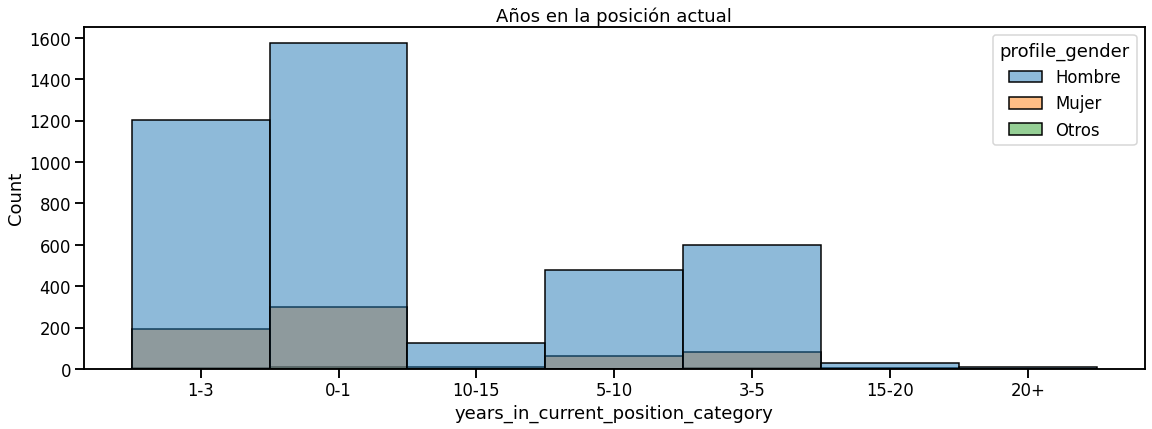

In [309]:
fig, axes = plt.subplots(figsize=(16, 6))
plt.title('Años en la posición actual')
fig.tight_layout()
seaborn.histplot(data=df2, x='years_in_current_position_category', hue='profile_gender', hue_order = gender_hue)

In [310]:
def int_years(yoe):
  return int(yoe)

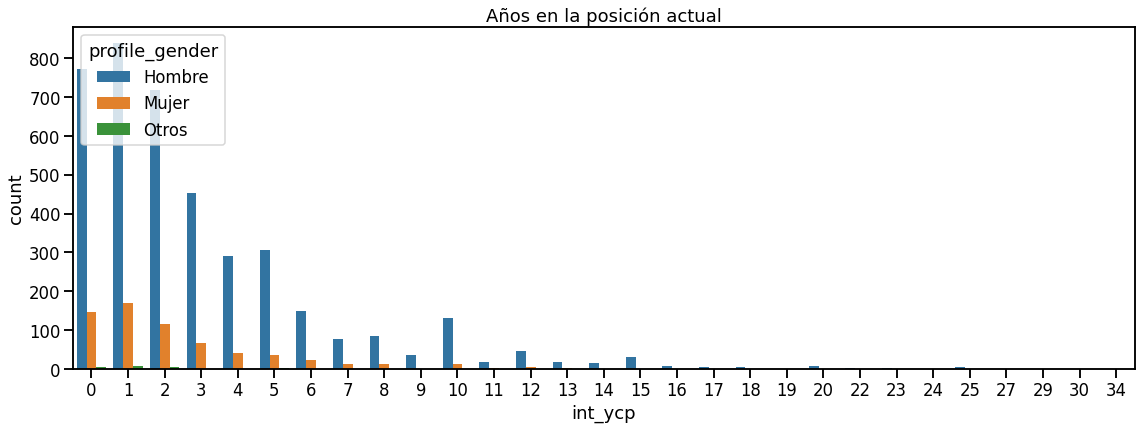

In [311]:
df2['int_ycp']= df2.work_years_in_current_position.apply(int_years)
fig, axes = plt.subplots(figsize=(16, 6))
plt.title('Años en la posición actual')
fig.tight_layout()
seaborn.countplot(data=df2, x='int_ycp', hue='profile_gender', hue_order = gender_hue)

### Años en la compañia

De la sección anterior se vé que la mayoría de los casos está comenzando ( o comenzó hace menos de tres años) una posición nueva. Cabe la pregunta ¿Es en la misma compañia, o se debe a un cambio de empresa? 

In [312]:
df2.columns
df2.work_years_in_company.value_counts()

0.0     1128
1.0      866
2.0      716
3.0      436
5.0      266
4.0      237
6.0      145
10.0     138
7.0      117
8.0      111
9.0       82
12.0      74
13.0      52
15.0      44
11.0      42
1.5       40
14.0      33
20.0      30
16.0      25
17.0      13
2.5       12
18.0      11
21.0       9
22.0       9
25.0       8
23.0       8
3.5        6
0.5        5
1.4        4
19.0       4
24.0       4
29.0       3
28.0       2
27.0       2
1.7        2
1.8        2
30.0       1
2.8        1
1.6        1
1.3        1
40.0       1
2.6        1
2.7        1
43.0       1
Name: work_years_in_company, dtype: int64

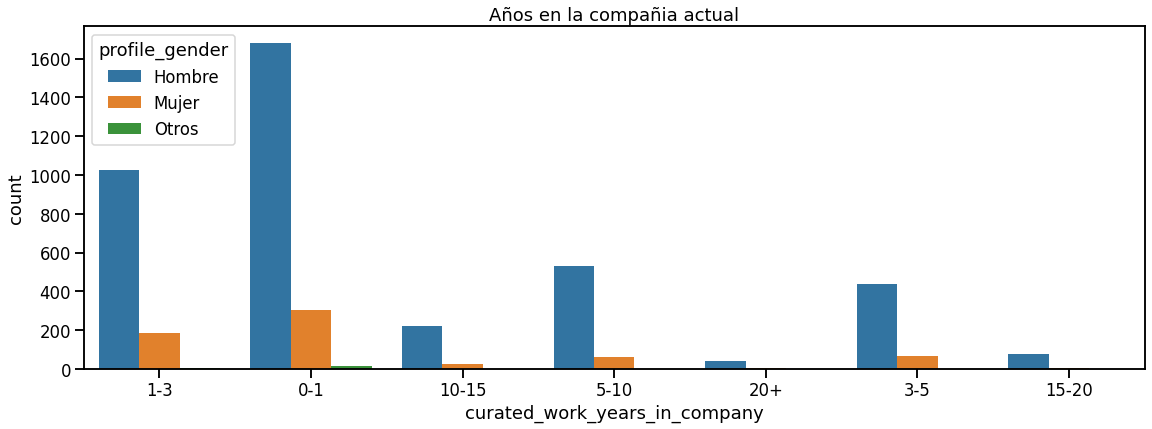

In [313]:
curate_years_in_company = curate_years_in_current_position
df2['curated_work_years_in_company'] = df2.work_years_in_company.apply(curate_years_in_company)

fig, axes = plt.subplots(figsize=(16, 6))
plt.title('Años en la compañia actual')
fig.tight_layout()
seaborn.countplot(data = df2 ,  x = 'curated_work_years_in_company', hue = 'profile_gender')

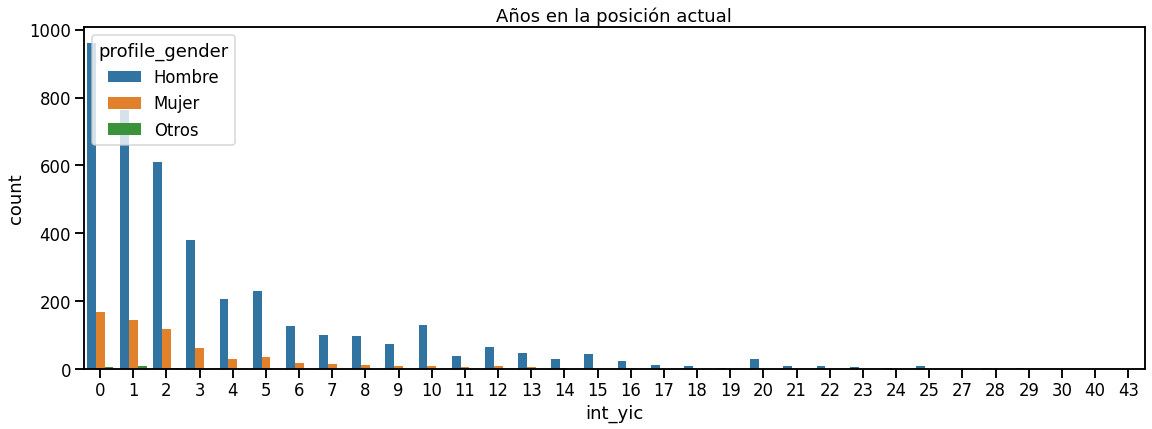

In [314]:
df2['int_yic']= df2.work_years_in_company.apply(int_years)
fig, axes = plt.subplots(figsize=(16, 6))
plt.title('Años en la posición actual')
fig.tight_layout()
seaborn.countplot(data=df2, x='int_yic', hue='profile_gender', hue_order = gender_hue)

La gran mayoría de las respuestas (para hombres y mujeres) denota que al momento de contestar la encuesta ha cambiado de compañia recientemente.



Para estudiar la correlación de estas dos variables, podemos visualizar su variación en conunto. El siguiente gráfico indica que existen todos los escenarios

* Personas que llevan tanto tiempo en la posición actual como en la empresa en la que trabajan
* Personas que se encuentran en una posición nueva, pero en la misma empresa que la posición anterior
* Personas que cambian de empresa, pero no necesariamente realizan una tarea nueva

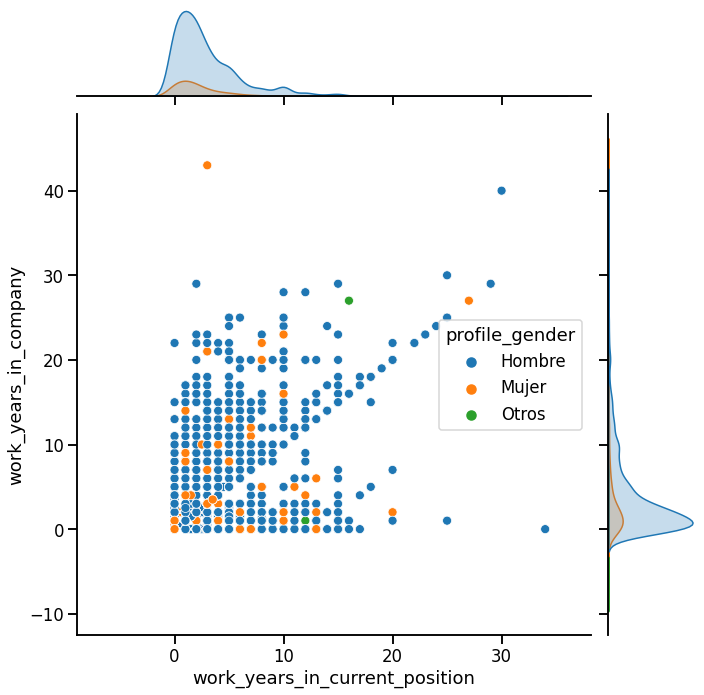

In [315]:

seaborn.jointplot(data=df2[df2.profile_age < 75], x='work_years_in_current_position',
                  y='work_years_in_company', height=10, hue='profile_gender') 

### Personas a cargo

La gran mayoría de las personas que contestaron la encuesta tienen 10 o menos personas a cargo.

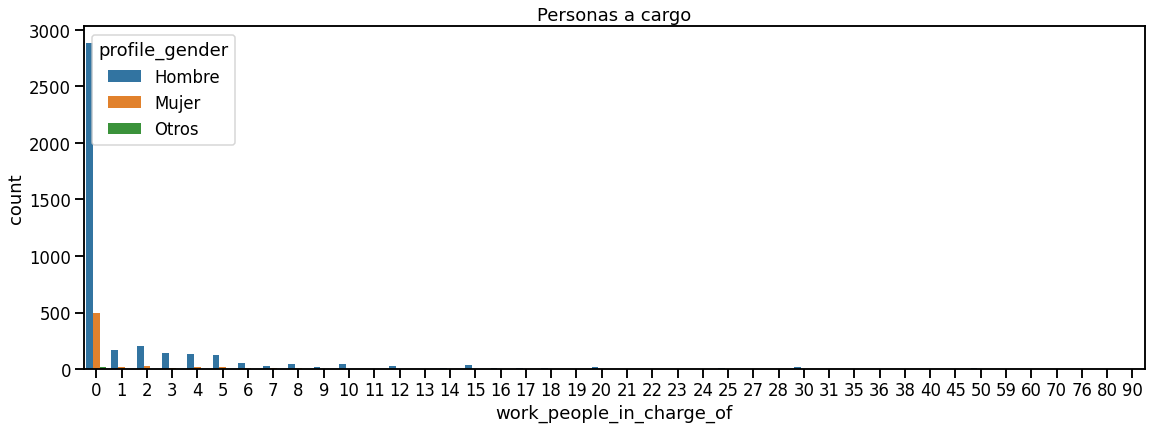

In [316]:
fig, axes = plt.subplots(figsize=(16, 6))
plt.title('Personas a cargo')
fig.tight_layout()
seaborn.countplot(data=df2[df2['work_people_in_charge_of'] < 100], x='work_people_in_charge_of', hue='profile_gender', hue_order = gender_hue)

#df2 [df2.work_years_in_company < 35 & (df2.work_years_in_company < df2.work_years_in_current_position) ]

¿Cómo se relaciona la permanencia en una compañia / rol con la gente a cargo? No podemos afirmar que estar mas años en la misma compañia indique que se van a liderar equipos. Para personas con menos de 50 personas a cargo vemos qeu no hay correlación entre estas dos variables

In [317]:
def a_cargo(data, lb, ub):
  f = ((data['work_people_in_charge_of'] > lb) & (data['work_people_in_charge_of'] < ub))
  return data[f]

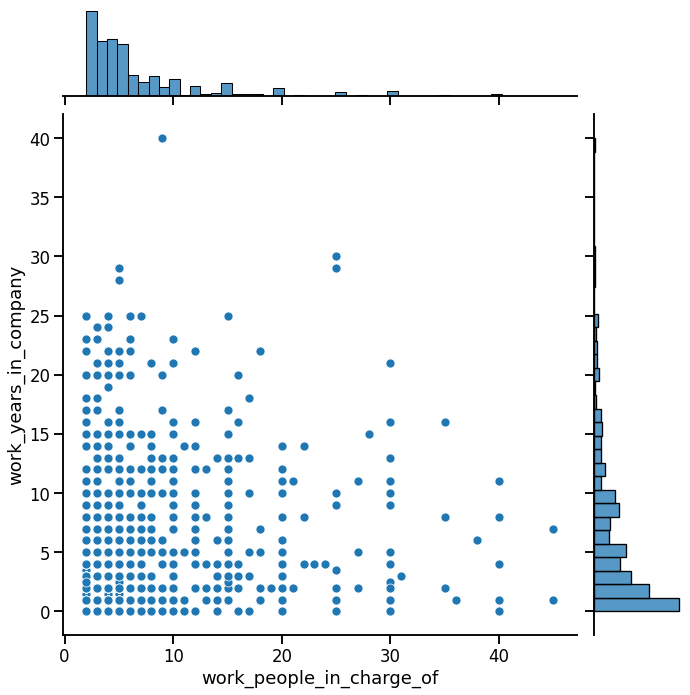

In [318]:
a_cargo_de_0_50 = a_cargo(df2, 1, 50)
seaborn.jointplot(data= a_cargo_de_0_50, x='work_people_in_charge_of',
                  y='work_years_in_company', height=10) 

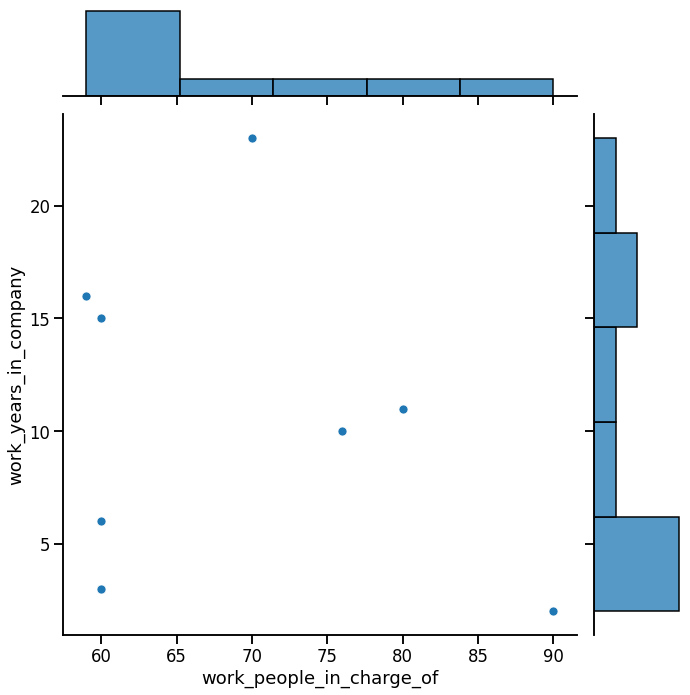

In [320]:
a_cargo_de_50_100 = a_cargo(df2, 50, 100)
seaborn.jointplot(data= a_cargo_de_50_100, x='work_people_in_charge_of',
                  y='work_years_in_company', height=10) 

Para cerrar este punto, calculamos la correlación entre las variables numéricas:
* Existe una correlación positiva entre los años en la compañia y los años en el rol actual. Esto puede indicar poca movilidad dentro de una misma empresa.
* Por otro lado, existe una correlación positiva (pero cercana a 0) entre la cantidad de personas a cargo y los años en la posición actual. 
* La correlación entre años en la compañia y personas a cargo también es positiva, lo que podría indicar que a medida que una persona permanece mas tiempo en la compañia

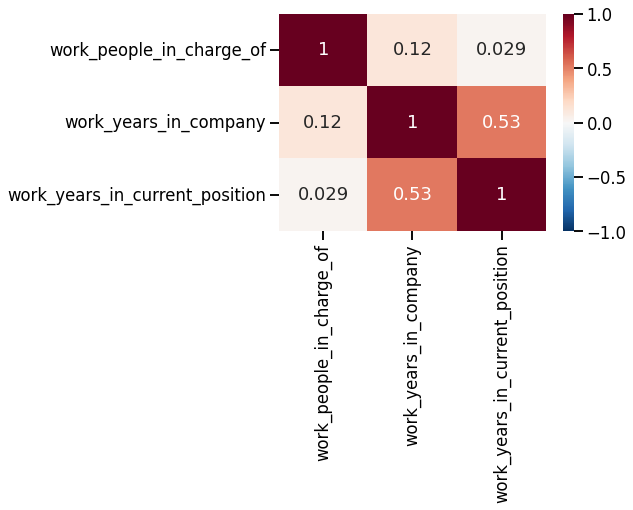

In [215]:
c1 = df2[['work_people_in_charge_of', 'work_years_in_company', 'work_years_in_current_position']]
seaborn.heatmap(
    c1.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



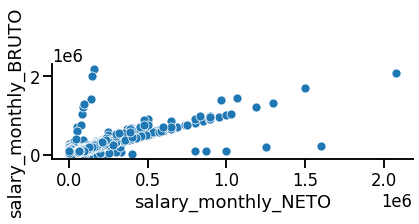

In [321]:
max_age = 99
seaborn.pairplot(data=df[df.profile_age < max_age],
                 y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=3)

In [322]:
df['diferencia_sueldos_neto_bruto'] = df[bruto] - df[neto]
df['diferencia_sueldos_neto_bruto'].describe().round()

count       5883.0
mean       27074.0
std        66821.0
min     -1396000.0
25%         9000.0
50%        17000.0
75%        35000.0
max      2022000.0
Name: diferencia_sueldos_neto_bruto, dtype: float64

¿Cómo evoluciona la relación entre el sueldo bruto y el sueldo neto, a medida que se incrementa el sueldo neto? La relación entre el sueldo bruto y neto es mayor a uno para todos los casos, lo que indica que la correlación entre estas variables será positiva.

In [323]:

def adds_gross_to_net_ratio(data, name='ratio'):
  bruto = 'salary_monthly_BRUTO'
  neto = 'salary_monthly_NETO'

  n = data[[bruto, neto]].describe().round()
  n['ratio'] = n[bruto].div(n[neto])
  return n

salarios = adds_gross_to_net_ratio(df)
salarios



,salary_monthly_BRUTO,salary_monthly_NETO,ratio
count,6095.0,5883.0,1.036036
mean,124059.0,94908.0,1.307150
std,122912.0,96862.0,1.268939
min,1.0,1.0,1.000000
25%,61595.0,51480.0,1.196484
50%,96000.0,78000.0,1.230769
75%,145000.0,106000.0,1.367925
max,2180000.0,2080000.0,1.048077


El coeficiente de relación entre el salario bruto y el salario neto es positivo, por lo que el sueldo neto aumenta a medida que aumenta el bruto

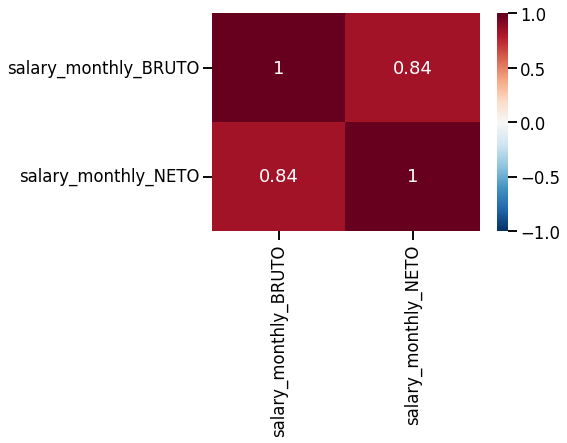

In [326]:
c1 = df2[['salary_monthly_BRUTO','salary_monthly_NETO']]
seaborn.heatmap(
    c1.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

In [329]:
df2.curated_contract_type.value_counts()

Full-Time               4136
Remoto                   193
Consultora / Agencia     152
Freelance                116
Part-Time                 97
Name: curated_contract_type, dtype: int64

Particularmente vemos que para los casos de empleos _Full Time_ o _Part time_ el coeficiente de correlación es menor que para el resto de los tipos de contratación

In [332]:
def corr_wt(data):
  c1 = data[['salary_monthly_BRUTO','salary_monthly_NETO']]
  seaborn.heatmap(
    c1.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

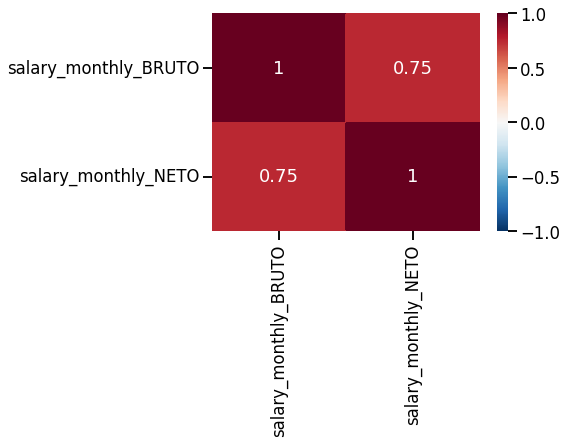

In [336]:
full_time = df2[(df2.curated_contract_type == 'Full-Time') | (df2.curated_contract_type == 'Part-Time')]
corr_wt(full_time)


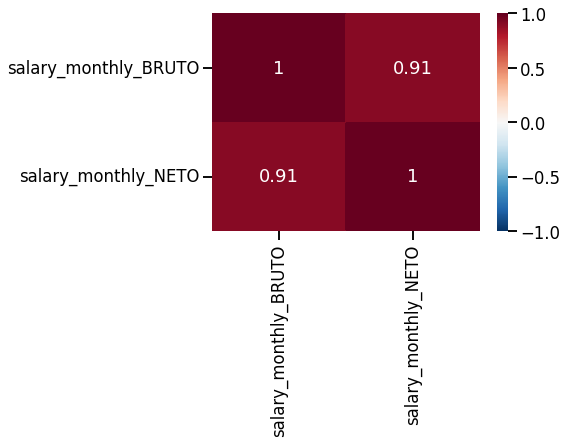

In [338]:
f = (df2.curated_contract_type != 'Full-Time') & (df2.curated_contract_type != 'Part-Time')
full_time = df2[f]
corr_wt(full_time)

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






Primero, veamos la distribución del nivel de estudios

In [ ]:
df.profile_studies_level.value_counts()

In [ ]:
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario', 'Posgrado', 'Doctorado', 'Posdoctorado'] 

fig = plt.figure(figsize=(6,4)) 
seaborn.countplot(df.profile_studies_level, color='steelblue', order=sorted_studies_levels) 
plt.xticks(rotation=30)
plt.show()

Vemos que las dos subpoblaciones mas representativas corresponden a los programadores con estudios universitarios en primer lugar y con estudios tenciarios en segundo lugar, por lo que nos centraremos en su análisis.

In [ ]:
f_df= df[df['salary_monthly_NETO'] < 200000]
df_U = f_df[ f_df['profile_studies_level']=='Universitario']
df_T = f_df[ f_df['profile_studies_level']=='Terciario']

fig = plt.figure(figsize=(16,4)) 

plt.hist(df_U['salary_monthly_NETO'], color='orangered', bins=50)
plt.hist(df_T['salary_monthly_NETO'], color='steelblue', bins=50) 

plt.axvline(df_U['salary_monthly_NETO'].mean(), color='red',    linestyle='--', label='Media Universitarios')
plt.axvline(df_U['salary_monthly_NETO'].median(), color='orange',    linestyle='--', label='Media Universitarios')
plt.axvline(df_T['salary_monthly_NETO'].mean(), color='indigo', linestyle='-.', label='Media Terciarios')
plt.axvline(df_T['salary_monthly_NETO'].median(), color='blue', linestyle='-.', label='Media Terciarios')

plt.xlabel("Salario Mensual Neto")
plt.ylabel("Conteo")
plt.title('Histograma de Salario Mensual Neto para estudios Terciarios y Universitarios')

plt.show()

Ambas distribuciones lucen similares. Sin embargo, vemos que la media y la mediana de los programadores con estudios Universitarios es superior a la de los que realizaron un Terciario. En ambos casos, la media de cada grupo supera a la mediana. Sin embargo, podemos notar que la diferencia entre media y mediana es menor en el grupo Universitario que en el Terciario, lo que nos lleva a pensar que el primero tiene una distribución mas simétrica. Observando detenidamente el histograma, podemos notar que esto es asi, saso que la densidad de Universitarios no comienza a descender claramente hasta bien superada la media, cerca de los 100 000 mensuales, mientras que la densidad de Terciarios alcanza su moda antes que la media, y comienza a descender desde entonces.


Estos gráficos sugieren que existe una dependencia entre el nivel salarial y el nivel de estudios alcanzado por un programador. 

Veamos los valores estadísticos de cada subpoblación

In [ ]:
f_df= df[df['salary_monthly_NETO'] < 1500000]
df_U = f_df[ f_df['profile_studies_level']=='Universitario']
df_T = f_df[ f_df['profile_studies_level']=='Terciario']

def est_T_U(data, name='ratio'):
  n = pd.DataFrame()
  n['Terciario']     = df_T['salary_monthly_NETO'].describe().round()
  n['Universitario'] = df_U['salary_monthly_NETO'].describe().round()
  n['Relación'] = n['Terciario'].div(n['Universitario'])
  return n

est = est_T_U(df)
est

En la anterios tabla de estadísticas puede verse que los programadores con estudios Universitarios cuentan con mejores perspectivas desde todo punto de visque que aquelos que solo han realizado un terciario. Tanto la media y la disperción como los demás valores intercuartílicos son mayores en el grupo Universitario. 

Concluimos que, en este caso, la diferencia en el nivel educativo asegura un 
mejor salario de base, dando también mayores probabilidades de acceder a salarios superiores al promedio. 

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


Variables numéricas: Años de experiencia y gente a cargo.

Variable categorica: Nivel de estudios.

In [ ]:
f_df =   df[  df.profile_years_experience < 50]
f_df = f_df[f_df.work_people_in_charge_of < 500]

sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario', 'Posgrado', 'Doctorado', 'Posdoctorado']

fig = plt.figure(figsize=(16,16)) 

seaborn.scatterplot(data=f_df,
                    x='profile_years_experience',
                    y='work_people_in_charge_of', 
                    hue='profile_studies_level',
                    style=None, 
                    size= None,
                    hue_order=sorted_studies_levels
                   # aspect=2, height=3
                    )

plt.show()

Este grafico es bastante interesante. 

Lo primero que notamos es que, si bien en primera instancia la cantidad de gente a cargo incrementa con los años de experiencia, la relación se invierte superados los 20 años de experiencia. Esto podria indicar que los programadores mas veteranos prefieren trabajos menos demandantes, que no requieran liderar gran cantidad de gente. Por otro lado, esto podria deberse quizás a que los jefes no consideran que la gente mayor esté capacitada para llevar adelante grandes empresas, por lo que empiezan a relevarlos de sus cargos. 

Otra cosa que llama la atención es la cantidad de programadores con pocos años de experiencia pero muchas personas a cargo. Esto podría hablarnos de gente altamente capacitada que se preparó para un puesto específico, o quizás de nepotismo. 

Vemos que, en general, dominan los programadores de nivel Universitario. La densidad de estos es múy alta, manteniendo su proporción para distintos años de experiencia y cantidad de gente a cargo. Algo similar ocurre con los de niver Terciario. Por su parte, l gente de nivel Secundario abunda entre los de menor cantidad de años de experiencia, y disminuye conforme crece esta variable. Finalmente, los de Posgrado y superior son mas comunes entre la gente de mas años de experiencia. Esto puede hablarnos del recorrido de los programadores, que a medida que van completando niveles educativos adquieren tambien años en el rubro. 

En cuanto a la gente a cargo, los de nivel universitario tambien dominan en este aspecto, seguidos por los de nivel Terciario, Posgrado y Doctorado. Podriamos pensar que la gente ideal para dirigir a grandes grupos de personas es aquella que esta altamente calificada, pero no demasiado. 

Un vistazo general parece indicar que el momento culmine en la carrera de un programador se da a mitad de esta, donde no es ni demasiado viejo ni demasiado especializado.